In [39]:
import time
#import board
#import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib
import seaborn as sns
import datetime
import os
from pandas import concat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from numpy import loadtxt
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [2]:
def file():
    
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    file_name = 'csvFile_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    suffix = '.csv'
    filePath = os.path.join(os.getcwd(), file_name + suffix)
    return  filePath

In [3]:
def fileNameForDLFigures(midfix = None):
    
    
    from datetime import date
    today = date.today()
    # dd/mm/YY
    d1 = today.strftime("%d_%m_%Y")
    #print("d1 =", d1)
    cwdir = os.getcwd()
    mkSubDir =  os.path.join(cwdir, d1)
    mkSubDir
    if not os.path.exists(mkSubDir):
        #os.makedirs('my_folder')
        os.mkdir(mkSubDir)
    #path = '/home/yogender/Desktop/KaggleHousePricePrediction/raspiData/Raspi2_second_currentLoop_RemoteMySql'
    #file_name = 'csvFile_2021_04_20'
    head, tail = os.path.split(file())
    name =tail.split('_')[1:]
    file_name = "_".join(name)
    file_name=file_name.split('.')[0]
    #join

    #file_name = 'DL_2021_04_28'
    #file_name = 'csvFile_2021_04_19'
    #file_name ='csvFile_2021_03_30'
    
    #cwdir = os.getcwd()
    #mkSubDir =  os.path.join(cwdir, 'DL_sub')
    suffix = '.svg'
    filePath = os.path.join(mkSubDir, midfix + file_name +suffix)
    return  filePath

In [4]:
def modelDir(ModelName=None):
    model = fileNameForDLFigures(midfix = 'Tem').split('/')[:-1]
    model_dir = "/".join(model)
    #model_dir 
    modelPath = os.path.join(model_dir, ModelName)
    return modelPath

In [5]:
def filePath2Pandas(file_path):
    drop_column = 'Unnamed: 0'
    df = pd.read_csv(file_path, delimiter=',').drop(drop_column, axis = 'columns')

    column_names =  ['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T4', 'T3', 'T2', 'T1',
        'T0', 'T9', 'T8', 'T7', 'T6', 'T5', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']
    df.columns =column_names
    df = df[['id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir',
       'TtopSourceTank', 'TloadTankMix', 'TTopTestTankLoadCir', 'TloadMix',
       'TbottomSourceTank', 'TbottomTestTankLoadCir', 'T0', 'T1', 'T2', 'T3',
        'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'flowHP', 'flowLoad', 'Load_kW',
       'Heat_Capacity_kW', 'electrcity_kW', 'COP', 'nDis', 'timeStamp_Temp',
       'timeStamp_watt', 'entropy_kJ/K', 'entropy_kJ', 'nStratCharging',
       'TotalTanksEnergyForAvailability_kJ', 'DisEntropy_kj/K',
       'DisEntropy_kj', 'nStratDischarge',
       'DisTotalTanksEnergyForAvailability_kJ']]
    
    #df.columns.values[[11,12,13,14,15,16,17,18,19,20]] = ['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']

    return df
df_gross=filePath2Pandas(file())  


In [11]:
df_gross

,id,dateTime,Tamb,TtopTestTankHPCir,TbottomTestTankHpCir,TtopSourceTank,TloadTankMix,TTopTestTankLoadCir,TloadMix,TbottomSourceTank,...,timeStamp_Temp,timeStamp_watt,entropy_kJ/K,entropy_kJ,nStratCharging,TotalTanksEnergyForAvailability_kJ,DisEntropy_kj/K,DisEntropy_kj,nStratDischarge,DisTotalTanksEnergyForAvailability_kJ
0,4454,2021-04-28 10:07:55,21.5079,23.9417,20.7308,21.1024,20.7983,22.6570,23.0626,20.9335,...,0.000556,0.000556,139.077477,2965.574490,-94497.791353,36175.774422,45.587785,966.243093,-17.586198,79600.616576
1,4458,2021-04-28 10:08:01,21.4741,23.9755,20.7646,21.0686,20.7983,22.7246,23.1979,20.9673,...,0.001667,0.001667,141.627621,3059.504341,-387.193183,36170.428697,60.941894,1295.849404,-6.165200,79610.121673
2,4461,2021-04-28 10:08:07,21.4741,23.9755,20.7308,21.1024,20.8321,22.6908,23.0964,20.8997,...,0.001667,0.001667,125.689032,2723.618813,-127.045297,36213.454781,72.696521,1569.888180,-3.167760,79590.150490
3,4465,2021-04-28 10:08:13,21.4741,23.9755,20.7646,21.0686,20.8321,22.6908,23.0964,20.8997,...,0.001667,0.001944,80.244741,1689.563332,-52.318238,36170.400136,85.911454,1869.682871,-1.757351,79519.263505
4,4469,2021-04-28 10:08:20,21.4741,23.7726,21.0348,21.0348,20.7983,22.6908,23.1979,20.8659,...,0.001944,0.001667,9.720839,206.503154,-4.831422,36208.085998,90.369319,1954.019239,-1.186420,79455.637392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,9226,2021-04-28 12:24:21,23.6036,27.7989,21.7444,20.0552,34.9158,27.1896,31.0843,16.2744,...,0.001944,0.001667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1294,9230,2021-04-28 12:24:28,23.6374,27.6973,21.7782,20.0890,34.9837,26.7157,30.8810,16.3081,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1295,9234,2021-04-28 12:24:35,23.6374,27.6973,21.7782,20.0552,34.9158,26.7496,30.5083,16.3081,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1296,9238,2021-04-28 12:24:42,23.6036,27.6973,21.8120,20.0890,34.9158,27.8666,30.4744,16.3418,...,0.001944,0.001944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def charging_df(df):
    #df_tem = df[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    ##df_tem = df_tem[df_tem>0]
    #df_charging = df.loc[df_gross['Heat_Capacity_kW']>0.2]

    #df_tem = df_charging[['T4', 'T3', 'T2', 'T1','T0', 'T9', 'T8', 'T7', 'T6', 'T5']]
    df_all = df[['T0', 'T1', 'T2', 'T3','T4', 'T5', 'T6', 'T7', 'T8', 'T9']]
    #df_chargeFilter = df_charging_all[(df_charging_all['nStratCharging']>0.000001)&\
    #                           (df_charging_all['nStratCharging']<1.1)]
    #df_charging_all.dropna()
    return df_all.dropna()

chargingIn_df = charging_df(df_gross)

In [14]:
chargingIn_df

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,20.9335,21.3051,21.4065,21.7782,21.9810,22.2514,22.4542,22.6570,22.7246,22.5894
1,20.9335,21.3051,21.4065,21.7782,21.8796,22.2514,22.4542,22.6570,22.7246,22.5556
2,20.9673,21.3051,21.4065,21.7782,21.9134,22.3528,22.4542,22.6232,22.7584,22.5894
3,20.9673,21.2714,21.4403,21.8458,21.8796,22.2514,22.4542,22.6232,22.7246,22.5894
4,20.9335,21.3051,21.4065,21.8120,21.9472,22.4204,22.4542,22.6908,22.7584,22.5894
...,...,...,...,...,...,...,...,...,...,...
1293,22.0824,22.4880,22.1162,21.8796,21.6430,21.5417,21.6093,21.9472,23.4345,30.9488
1294,22.1500,22.4880,22.1500,21.9810,21.6430,21.6093,21.6430,21.9472,23.3669,30.5422
1295,22.1838,22.4542,22.1500,22.0148,21.6768,21.7106,21.6430,21.9472,23.1640,30.1695
1296,22.2176,22.4204,22.1500,21.9810,21.6430,21.6430,21.6430,21.8458,23.0288,29.8646


In [17]:
"""
Normalization should be done BEFORE one prepares the data for ANN or LSTM input.
Normalization is done feature-wise (that means column-wise).
"""

def normalize(X):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(X)
    scaled_data = scaler.transform(X)
    return scaled_data, scaler

df_nrm, scaler = normalize(chargingIn_df)
df_nrm = pd.DataFrame(df_nrm)
df_nrm.columns = chargingIn_df.columns
#df_nrm.shape

In [18]:
df_nrm

,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9
0,-0.995632,-0.986363,-0.975444,-0.956290,-0.935359,-0.929881,-0.930030,-0.948897,-0.989134,-0.991230
1,-0.995632,-0.986363,-0.975444,-0.956290,-0.941825,-0.929881,-0.930030,-0.948897,-0.989134,-0.993422
2,-0.991263,-0.986363,-0.975444,-0.956290,-0.939670,-0.923506,-0.930030,-0.951026,-0.986961,-0.991230
3,-0.991263,-0.988631,-0.973211,-0.951918,-0.941825,-0.929881,-0.930030,-0.951026,-0.989134,-0.991230
4,-0.995632,-0.986363,-0.975444,-0.954104,-0.937514,-0.919256,-0.930030,-0.946768,-0.986961,-0.991230
...,...,...,...,...,...,...,...,...,...,...
1293,-0.847150,-0.906784,-0.928558,-0.949732,-0.956912,-0.974504,-0.983036,-0.993612,-0.943490,-0.448979
1294,-0.838413,-0.906784,-0.926325,-0.943173,-0.956912,-0.970254,-0.980922,-0.993612,-0.947836,-0.475354
1295,-0.834045,-0.909058,-0.926325,-0.940987,-0.954757,-0.963884,-0.980922,-0.993612,-0.960882,-0.499530
1296,-0.829677,-0.911331,-0.926325,-0.943173,-0.956912,-0.968135,-0.980922,-1.000000,-0.969575,-0.519308


In [19]:

#######################################
# prepare functions for ANN
# by flattning k rows to one table row (input for sample)
# and generating the corresponding next line (y)
#######################################

"""
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])
X, y = prepare_df(df)

last row is last y
X doesn't contain last row and begins from first row!
"""

def flatten_row_wise(df):
    """Take row by row and attach to one flat single row."""
    return np.ndarray.flatten(np.array(df))

def prepare_df(df):
    n_rows, n_cols = df.shape
    new_rows = np.array([flatten_row_wise(df.iloc[(i-k):i]) for i in range(k, n_rows)])
    new_ys = np.array([row for row in df.iloc[(k):, :].itertuples(index=False)])
    # idxs = [x[0] for x in new_ys]
    # new_ys = [x[1] for x in new_ys]
    return new_rows, new_ys



In [115]:
k = 3
epochs =10000
batch_size = 1000
n_features = 10
#n_features = 10 is 10 when, input in 10 columns temperature

In [116]:

Xdf1, ydf1 = prepare_df(df_nrm)

#Xdf2, ydf2 = prepare_df(y)
Xdf1.shape

(1295, 30)

In [117]:
def train_test_split_indexes(X, y, test_size=0.2, random_state=42, shuffle=False):
    X_train_indexes, X_test_indexes, y_train_indexes, y_test_indexes = train_test_split(pd.DataFrame(list(range(X.shape[0]))),
                                                                                        pd.DataFrame(list(range(y.shape[0]))),
                                                                                        test_size=test_size,
                                                                                        random_state=random_state,
                                                                                        shuffle=shuffle)
    train_indexes, test_indexes = [x for x in X_train_indexes.iloc[:, 0]]  , [x for x in X_test_indexes.iloc[:, 0]]
    return sorted(train_indexes), sorted(test_indexes)


In [118]:
def splitter(X, y, train_indexes, test_indexes):
    X_train = X.iloc[train_indexes, :]
    y_train = y.iloc[train_indexes, :]
    X_test = X.iloc[test_indexes, :]
    y_test = y.iloc[test_indexes, :]
    return X_train, X_test, y_train, y_test


In [119]:
train_indexes, test_indexes = train_test_split_indexes(Xdf1, ydf1, test_size=0.2, random_state=42, shuffle=True)
X_train, X_test, y_train, y_test = splitter(pd.DataFrame(Xdf1), pd.DataFrame(ydf1), train_indexes, test_indexes)




In [120]:
X_train = np.array(X_train)

X_test = np.array(X_test)

y_train = np.array(y_train)

y_test = np.array(y_test)

In [121]:
def create_model(time_steps, n_features):
    model = Sequential()
    model.add(LSTM(64, input_shape = (time_steps, n_features)))
    model.add(Dropout(0.2))
    model.add(Dense(n_features, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model


In [122]:
model = create_model(k, n_features)
model_fpath=modelDir(ModelName='OnlyTemTForGitFigures.h5')
callbacks_list = [ ModelCheckpoint(filepath=model_fpath,
                                   monitor="val_accuracy",
                                   save_best_only=True,
                           
                                   mode="min")]

In [123]:
X_train.shape
y_train.shape

(1036, 10)

In [124]:
history = model.fit(X_train.reshape(X_train.shape[0], k, n_features),
                    y_train.reshape(y_train.shape[0], n_features),
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.3,
                    callbacks = callbacks_list,
                    verbose=1)


Train on 725 samples, validate on 311 samples
Epoch 1/10000
725/725 [==============================] - 1s 1ms/step - loss: 0.5155 - accuracy: 0.1103 - val_loss: 0.7894 - val_accuracy: 0.0000e+00
Epoch 2/10000
725/725 [==============================] - 0s 67us/step - loss: 0.4890 - accuracy: 0.1131 - val_loss: 0.7716 - val_accuracy: 0.0000e+00
Epoch 3/10000
725/725 [==============================] - 0s 63us/step - loss: 0.4651 - accuracy: 0.1117 - val_loss: 0.7542 - val_accuracy: 0.0000e+00
Epoch 4/10000
725/725 [==============================] - 0s 66us/step - loss: 0.4378 - accuracy: 0.1131 - val_loss: 0.7374 - val_accuracy: 0.0000e+00
Epoch 5/10000
725/725 [==============================] - 0s 96us/step - loss: 0.4152 - accuracy: 0.1076 - val_loss: 0.7211 - val_accuracy: 0.0000e+00
Epoch 6/10000
725/725 [==============================] - 0s 92us/step - loss: 0.3916 - accuracy: 0.1034 - val_loss: 0.7052 - val_accuracy: 0.0000e+00
Epoch 7/10000
725/725 [==============================] 

Epoch 56/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0165 - accuracy: 0.2234 - val_loss: 0.4127 - val_accuracy: 0.0000e+00
Epoch 57/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0165 - accuracy: 0.2124 - val_loss: 0.4132 - val_accuracy: 0.0000e+00
Epoch 58/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0170 - accuracy: 0.2166 - val_loss: 0.4136 - val_accuracy: 0.0000e+00
Epoch 59/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0155 - accuracy: 0.2566 - val_loss: 0.4140 - val_accuracy: 0.0000e+00
Epoch 60/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0166 - accuracy: 0.2510 - val_loss: 0.4143 - val_accuracy: 0.0000e+00
Epoch 61/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0159 - accuracy: 0.2483 - val_loss: 0.4145 - val_accuracy: 0.0000e+00
Epoch 62/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0165 - accura

Epoch 111/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0127 - accuracy: 0.2731 - val_loss: 0.3997 - val_accuracy: 0.0000e+00
Epoch 112/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0124 - accuracy: 0.2828 - val_loss: 0.3995 - val_accuracy: 0.0000e+00
Epoch 113/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0117 - accuracy: 0.2621 - val_loss: 0.3993 - val_accuracy: 0.0000e+00
Epoch 114/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0122 - accuracy: 0.2469 - val_loss: 0.3992 - val_accuracy: 0.0000e+00
Epoch 115/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0115 - accuracy: 0.2717 - val_loss: 0.3992 - val_accuracy: 0.0000e+00
Epoch 116/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0116 - accuracy: 0.2538 - val_loss: 0.3992 - val_accuracy: 0.0000e+00
Epoch 117/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0127 -

Epoch 165/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0105 - accuracy: 0.3103 - val_loss: 0.3939 - val_accuracy: 0.0000e+00
Epoch 166/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0099 - accuracy: 0.2841 - val_loss: 0.3938 - val_accuracy: 0.0000e+00
Epoch 167/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0098 - accuracy: 0.2731 - val_loss: 0.3937 - val_accuracy: 0.0000e+00
Epoch 168/10000
725/725 [==============================] - 0s 49us/step - loss: 0.0099 - accuracy: 0.2428 - val_loss: 0.3936 - val_accuracy: 0.0000e+00
Epoch 169/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0099 - accuracy: 0.2414 - val_loss: 0.3935 - val_accuracy: 0.0000e+00
Epoch 170/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0103 - accuracy: 0.2538 - val_loss: 0.3933 - val_accuracy: 0.0000e+00
Epoch 171/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0098 -

Epoch 219/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0086 - accuracy: 0.2841 - val_loss: 0.3888 - val_accuracy: 0.0000e+00
Epoch 220/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0087 - accuracy: 0.2676 - val_loss: 0.3887 - val_accuracy: 0.0000e+00
Epoch 221/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0089 - accuracy: 0.2648 - val_loss: 0.3886 - val_accuracy: 0.0000e+00
Epoch 222/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0084 - accuracy: 0.2621 - val_loss: 0.3884 - val_accuracy: 0.0000e+00
Epoch 223/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0085 - accuracy: 0.2703 - val_loss: 0.3883 - val_accuracy: 0.0000e+00
Epoch 224/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0082 - accuracy: 0.2717 - val_loss: 0.3883 - val_accuracy: 0.0000e+00
Epoch 225/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0086 -

Epoch 273/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0080 - accuracy: 0.2662 - val_loss: 0.3850 - val_accuracy: 0.0000e+00
Epoch 274/10000
725/725 [==============================] - 0s 51us/step - loss: 0.0075 - accuracy: 0.2841 - val_loss: 0.3850 - val_accuracy: 0.0000e+00
Epoch 275/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0074 - accuracy: 0.2690 - val_loss: 0.3850 - val_accuracy: 0.0000e+00
Epoch 276/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0076 - accuracy: 0.3048 - val_loss: 0.3850 - val_accuracy: 0.0000e+00
Epoch 277/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0074 - accuracy: 0.2883 - val_loss: 0.3851 - val_accuracy: 0.0000e+00
Epoch 278/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0077 - accuracy: 0.2814 - val_loss: 0.3852 - val_accuracy: 0.0000e+00
Epoch 279/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0078 -

Epoch 327/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0071 - accuracy: 0.3021 - val_loss: 0.3812 - val_accuracy: 0.0000e+00
Epoch 328/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0067 - accuracy: 0.2786 - val_loss: 0.3811 - val_accuracy: 0.0000e+00
Epoch 329/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0073 - accuracy: 0.3090 - val_loss: 0.3810 - val_accuracy: 0.0000e+00
Epoch 330/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0066 - accuracy: 0.2841 - val_loss: 0.3809 - val_accuracy: 0.0000e+00
Epoch 331/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0069 - accuracy: 0.2621 - val_loss: 0.3808 - val_accuracy: 0.0000e+00
Epoch 332/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0068 - accuracy: 0.3062 - val_loss: 0.3808 - val_accuracy: 0.0000e+00
Epoch 333/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0070 -

Epoch 381/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0059 - accuracy: 0.3172 - val_loss: 0.3761 - val_accuracy: 0.0000e+00
Epoch 382/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0064 - accuracy: 0.3228 - val_loss: 0.3761 - val_accuracy: 0.0000e+00
Epoch 383/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0062 - accuracy: 0.2855 - val_loss: 0.3761 - val_accuracy: 0.0000e+00
Epoch 384/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0063 - accuracy: 0.3214 - val_loss: 0.3761 - val_accuracy: 0.0000e+00
Epoch 385/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0066 - accuracy: 0.2966 - val_loss: 0.3761 - val_accuracy: 0.0000e+00
Epoch 386/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0066 - accuracy: 0.2841 - val_loss: 0.3761 - val_accuracy: 0.0000e+00
Epoch 387/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0066 -

Epoch 435/10000
725/725 [==============================] - 0s 52us/step - loss: 0.0057 - accuracy: 0.3186 - val_loss: 0.3710 - val_accuracy: 0.0000e+00
Epoch 436/10000
725/725 [==============================] - 0s 44us/step - loss: 0.0061 - accuracy: 0.3159 - val_loss: 0.3708 - val_accuracy: 0.0000e+00
Epoch 437/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0060 - accuracy: 0.3117 - val_loss: 0.3706 - val_accuracy: 0.0000e+00
Epoch 438/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0057 - accuracy: 0.3131 - val_loss: 0.3705 - val_accuracy: 0.0000e+00
Epoch 439/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0061 - accuracy: 0.3186 - val_loss: 0.3703 - val_accuracy: 0.0000e+00
Epoch 440/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0059 - accuracy: 0.3241 - val_loss: 0.3702 - val_accuracy: 0.0000e+00
Epoch 441/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0061 -

Epoch 489/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0056 - accuracy: 0.3269 - val_loss: 0.3651 - val_accuracy: 0.0000e+00
Epoch 490/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0056 - accuracy: 0.3200 - val_loss: 0.3651 - val_accuracy: 0.0000e+00
Epoch 491/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0055 - accuracy: 0.3159 - val_loss: 0.3651 - val_accuracy: 0.0000e+00
Epoch 492/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0053 - accuracy: 0.3255 - val_loss: 0.3651 - val_accuracy: 0.0000e+00
Epoch 493/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0055 - accuracy: 0.3159 - val_loss: 0.3650 - val_accuracy: 0.0000e+00
Epoch 494/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0053 - accuracy: 0.3131 - val_loss: 0.3650 - val_accuracy: 0.0000e+00
Epoch 495/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0056 -

Epoch 543/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0053 - accuracy: 0.3228 - val_loss: 0.3584 - val_accuracy: 0.0000e+00
Epoch 544/10000
725/725 [==============================] - 0s 52us/step - loss: 0.0051 - accuracy: 0.3517 - val_loss: 0.3585 - val_accuracy: 0.0000e+00
Epoch 545/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0049 - accuracy: 0.3448 - val_loss: 0.3584 - val_accuracy: 0.0000e+00
Epoch 546/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0051 - accuracy: 0.3186 - val_loss: 0.3584 - val_accuracy: 0.0000e+00
Epoch 547/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0051 - accuracy: 0.3448 - val_loss: 0.3582 - val_accuracy: 0.0000e+00
Epoch 548/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0052 - accuracy: 0.3766 - val_loss: 0.3581 - val_accuracy: 0.0000e+00
Epoch 549/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0054 -

Epoch 597/10000
725/725 [==============================] - 0s 49us/step - loss: 0.0044 - accuracy: 0.3517 - val_loss: 0.3509 - val_accuracy: 0.0000e+00
Epoch 598/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0049 - accuracy: 0.3407 - val_loss: 0.3508 - val_accuracy: 0.0000e+00
Epoch 599/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0045 - accuracy: 0.3172 - val_loss: 0.3507 - val_accuracy: 0.0000e+00
Epoch 600/10000
725/725 [==============================] - 0s 46us/step - loss: 0.0045 - accuracy: 0.3324 - val_loss: 0.3505 - val_accuracy: 0.0000e+00
Epoch 601/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0047 - accuracy: 0.3269 - val_loss: 0.3503 - val_accuracy: 0.0000e+00
Epoch 602/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0047 - accuracy: 0.3283 - val_loss: 0.3501 - val_accuracy: 0.0000e+00
Epoch 603/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0046 

Epoch 651/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0045 - accuracy: 0.3614 - val_loss: 0.3433 - val_accuracy: 0.0000e+00
Epoch 652/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0044 - accuracy: 0.3310 - val_loss: 0.3430 - val_accuracy: 0.0000e+00
Epoch 653/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0047 - accuracy: 0.3545 - val_loss: 0.3428 - val_accuracy: 0.0000e+00
Epoch 654/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0046 - accuracy: 0.3228 - val_loss: 0.3425 - val_accuracy: 0.0000e+00
Epoch 655/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0047 - accuracy: 0.3462 - val_loss: 0.3423 - val_accuracy: 0.0000e+00
Epoch 656/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0045 - accuracy: 0.3655 - val_loss: 0.3421 - val_accuracy: 0.0000e+00
Epoch 657/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0045 -

Epoch 705/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0044 - accuracy: 0.3490 - val_loss: 0.3355 - val_accuracy: 0.0000e+00
Epoch 706/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0041 - accuracy: 0.3628 - val_loss: 0.3353 - val_accuracy: 0.0000e+00
Epoch 707/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0045 - accuracy: 0.3421 - val_loss: 0.3352 - val_accuracy: 0.0000e+00
Epoch 708/10000
725/725 [==============================] - 0s 53us/step - loss: 0.0043 - accuracy: 0.3614 - val_loss: 0.3350 - val_accuracy: 0.0000e+00
Epoch 709/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0043 - accuracy: 0.3641 - val_loss: 0.3348 - val_accuracy: 0.0000e+00
Epoch 710/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0043 - accuracy: 0.3628 - val_loss: 0.3346 - val_accuracy: 0.0000e+00
Epoch 711/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0043 

Epoch 759/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0039 - accuracy: 0.3614 - val_loss: 0.3288 - val_accuracy: 0.0000e+00
Epoch 760/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0040 - accuracy: 0.3710 - val_loss: 0.3287 - val_accuracy: 0.0000e+00
Epoch 761/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0039 - accuracy: 0.3490 - val_loss: 0.3287 - val_accuracy: 0.0000e+00
Epoch 762/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0040 - accuracy: 0.3462 - val_loss: 0.3286 - val_accuracy: 0.0000e+00
Epoch 763/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0038 - accuracy: 0.3779 - val_loss: 0.3286 - val_accuracy: 0.0000e+00
Epoch 764/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0038 - accuracy: 0.3255 - val_loss: 0.3287 - val_accuracy: 0.0000e+00
Epoch 765/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0038 -

Epoch 813/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0035 - accuracy: 0.3172 - val_loss: 0.3239 - val_accuracy: 0.0000e+00
Epoch 814/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0037 - accuracy: 0.3462 - val_loss: 0.3237 - val_accuracy: 0.0000e+00
Epoch 815/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0037 - accuracy: 0.3724 - val_loss: 0.3236 - val_accuracy: 0.0000e+00
Epoch 816/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0041 - accuracy: 0.3503 - val_loss: 0.3234 - val_accuracy: 0.0000e+00
Epoch 817/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0039 - accuracy: 0.3766 - val_loss: 0.3233 - val_accuracy: 0.0000e+00
Epoch 818/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0038 - accuracy: 0.3517 - val_loss: 0.3232 - val_accuracy: 0.0000e+00
Epoch 819/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0040 

Epoch 867/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0038 - accuracy: 0.3448 - val_loss: 0.3188 - val_accuracy: 0.0000e+00
Epoch 868/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0038 - accuracy: 0.3641 - val_loss: 0.3187 - val_accuracy: 0.0000e+00
Epoch 869/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0039 - accuracy: 0.3724 - val_loss: 0.3187 - val_accuracy: 0.0000e+00
Epoch 870/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0037 - accuracy: 0.3600 - val_loss: 0.3187 - val_accuracy: 0.0000e+00
Epoch 871/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0038 - accuracy: 0.3724 - val_loss: 0.3187 - val_accuracy: 0.0000e+00
Epoch 872/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0040 - accuracy: 0.3586 - val_loss: 0.3186 - val_accuracy: 0.0000e+00
Epoch 873/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0040 

Epoch 921/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0038 - accuracy: 0.3752 - val_loss: 0.3159 - val_accuracy: 0.0000e+00
Epoch 922/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0038 - accuracy: 0.3421 - val_loss: 0.3160 - val_accuracy: 0.0000e+00
Epoch 923/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0038 - accuracy: 0.3310 - val_loss: 0.3159 - val_accuracy: 0.0000e+00
Epoch 924/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0036 - accuracy: 0.3600 - val_loss: 0.3157 - val_accuracy: 0.0000e+00
Epoch 925/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0037 - accuracy: 0.3793 - val_loss: 0.3153 - val_accuracy: 0.0000e+00
Epoch 926/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0035 - accuracy: 0.3628 - val_loss: 0.3150 - val_accuracy: 0.0000e+00
Epoch 927/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0037 

Epoch 975/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0034 - accuracy: 0.3917 - val_loss: 0.3115 - val_accuracy: 0.0000e+00
Epoch 976/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0035 - accuracy: 0.3931 - val_loss: 0.3116 - val_accuracy: 0.0000e+00
Epoch 977/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0035 - accuracy: 0.3848 - val_loss: 0.3116 - val_accuracy: 0.0000e+00
Epoch 978/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0038 - accuracy: 0.3986 - val_loss: 0.3116 - val_accuracy: 0.0000e+00
Epoch 979/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0035 - accuracy: 0.3862 - val_loss: 0.3116 - val_accuracy: 0.0000e+00
Epoch 980/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0036 - accuracy: 0.3697 - val_loss: 0.3114 - val_accuracy: 0.0000e+00
Epoch 981/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0034 

Epoch 1029/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0032 - accuracy: 0.3710 - val_loss: 0.3087 - val_accuracy: 0.0000e+00
Epoch 1030/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0035 - accuracy: 0.3697 - val_loss: 0.3087 - val_accuracy: 0.0000e+00
Epoch 1031/10000
725/725 [==============================] - 0s 118us/step - loss: 0.0034 - accuracy: 0.3710 - val_loss: 0.3086 - val_accuracy: 0.0000e+00
Epoch 1032/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0032 - accuracy: 0.3586 - val_loss: 0.3085 - val_accuracy: 0.0000e+00
Epoch 1033/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0033 - accuracy: 0.3821 - val_loss: 0.3083 - val_accuracy: 0.0000e+00
Epoch 1034/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0034 - accuracy: 0.3669 - val_loss: 0.3081 - val_accuracy: 0.0000e+00
Epoch 1035/10000
725/725 [==============================] - 0s 81us/step - loss: 

Epoch 1083/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0034 - accuracy: 0.3476 - val_loss: 0.3057 - val_accuracy: 0.0000e+00
Epoch 1084/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0033 - accuracy: 0.3628 - val_loss: 0.3058 - val_accuracy: 0.0000e+00
Epoch 1085/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0034 - accuracy: 0.3393 - val_loss: 0.3059 - val_accuracy: 0.0000e+00
Epoch 1086/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0032 - accuracy: 0.3945 - val_loss: 0.3059 - val_accuracy: 0.0000e+00
Epoch 1087/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0035 - accuracy: 0.3572 - val_loss: 0.3057 - val_accuracy: 0.0000e+00
Epoch 1088/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0036 - accuracy: 0.3972 - val_loss: 0.3055 - val_accuracy: 0.0000e+00
Epoch 1089/10000
725/725 [==============================] - 0s 129us/step - loss: 

Epoch 1137/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0032 - accuracy: 0.3834 - val_loss: 0.3034 - val_accuracy: 0.0000e+00
Epoch 1138/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0032 - accuracy: 0.3683 - val_loss: 0.3036 - val_accuracy: 0.0000e+00
Epoch 1139/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0035 - accuracy: 0.3628 - val_loss: 0.3038 - val_accuracy: 0.0000e+00
Epoch 1140/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0033 - accuracy: 0.3862 - val_loss: 0.3039 - val_accuracy: 0.0000e+00
Epoch 1141/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0034 - accuracy: 0.3600 - val_loss: 0.3039 - val_accuracy: 0.0000e+00
Epoch 1142/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0038 - accuracy: 0.4000 - val_loss: 0.3038 - val_accuracy: 0.0000e+00
Epoch 1143/10000
725/725 [==============================] - 0s 65us/step - loss: 

Epoch 1191/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0034 - accuracy: 0.3862 - val_loss: 0.3014 - val_accuracy: 0.0000e+00
Epoch 1192/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0034 - accuracy: 0.4028 - val_loss: 0.3013 - val_accuracy: 0.0000e+00
Epoch 1193/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0029 - accuracy: 0.4055 - val_loss: 0.3012 - val_accuracy: 0.0000e+00
Epoch 1194/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0030 - accuracy: 0.3890 - val_loss: 0.3012 - val_accuracy: 0.0000e+00
Epoch 1195/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0032 - accuracy: 0.3752 - val_loss: 0.3012 - val_accuracy: 0.0000e+00
Epoch 1196/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0031 - accuracy: 0.3903 - val_loss: 0.3012 - val_accuracy: 0.0000e+00
Epoch 1197/10000
725/725 [==============================] - 0s 69us/step - loss: 0

Epoch 1245/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0031 - accuracy: 0.4345 - val_loss: 0.2994 - val_accuracy: 0.0000e+00
Epoch 1246/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0032 - accuracy: 0.4166 - val_loss: 0.2995 - val_accuracy: 0.0000e+00
Epoch 1247/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0030 - accuracy: 0.3628 - val_loss: 0.2996 - val_accuracy: 0.0000e+00
Epoch 1248/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0031 - accuracy: 0.3862 - val_loss: 0.2995 - val_accuracy: 0.0000e+00
Epoch 1249/10000
725/725 [==============================] - 0s 104us/step - loss: 0.0032 - accuracy: 0.3641 - val_loss: 0.2993 - val_accuracy: 0.0000e+00
Epoch 1250/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0028 - accuracy: 0.4028 - val_loss: 0.2991 - val_accuracy: 0.0000e+00
Epoch 1251/10000
725/725 [==============================] - 0s 91us/step - loss: 

Epoch 1299/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0031 - accuracy: 0.4055 - val_loss: 0.2969 - val_accuracy: 0.0000e+00
Epoch 1300/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0031 - accuracy: 0.3834 - val_loss: 0.2968 - val_accuracy: 0.0000e+00
Epoch 1301/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0030 - accuracy: 0.4110 - val_loss: 0.2968 - val_accuracy: 0.0000e+00
Epoch 1302/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0029 - accuracy: 0.3986 - val_loss: 0.2968 - val_accuracy: 0.0000e+00
Epoch 1303/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0029 - accuracy: 0.4290 - val_loss: 0.2968 - val_accuracy: 0.0000e+00
Epoch 1304/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0030 - accuracy: 0.4097 - val_loss: 0.2967 - val_accuracy: 0.0000e+00
Epoch 1305/10000
725/725 [==============================] - 0s 59us/step - loss: 0

Epoch 1353/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0029 - accuracy: 0.4179 - val_loss: 0.2958 - val_accuracy: 0.0000e+00
Epoch 1354/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0028 - accuracy: 0.3793 - val_loss: 0.2956 - val_accuracy: 0.0000e+00
Epoch 1355/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0026 - accuracy: 0.3766 - val_loss: 0.2954 - val_accuracy: 0.0000e+00
Epoch 1356/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0028 - accuracy: 0.3683 - val_loss: 0.2953 - val_accuracy: 0.0000e+00
Epoch 1357/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0031 - accuracy: 0.3821 - val_loss: 0.2952 - val_accuracy: 0.0000e+00
Epoch 1358/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0028 - accuracy: 0.4166 - val_loss: 0.2952 - val_accuracy: 0.0000e+00
Epoch 1359/10000
725/725 [==============================] - 0s 83us/step - loss: 0

Epoch 1407/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0029 - accuracy: 0.4041 - val_loss: 0.2937 - val_accuracy: 0.0000e+00
Epoch 1408/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0030 - accuracy: 0.4055 - val_loss: 0.2935 - val_accuracy: 0.0000e+00
Epoch 1409/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0030 - accuracy: 0.4083 - val_loss: 0.2932 - val_accuracy: 0.0000e+00
Epoch 1410/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0028 - accuracy: 0.4138 - val_loss: 0.2929 - val_accuracy: 0.0000e+00
Epoch 1411/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0029 - accuracy: 0.4138 - val_loss: 0.2927 - val_accuracy: 0.0000e+00
Epoch 1412/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0026 - accuracy: 0.4234 - val_loss: 0.2926 - val_accuracy: 0.0000e+00
Epoch 1413/10000
725/725 [==============================] - 0s 68us/step - loss: 0

Epoch 1461/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0030 - accuracy: 0.4207 - val_loss: 0.2919 - val_accuracy: 0.0000e+00
Epoch 1462/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0027 - accuracy: 0.4359 - val_loss: 0.2916 - val_accuracy: 0.0000e+00
Epoch 1463/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0028 - accuracy: 0.4345 - val_loss: 0.2911 - val_accuracy: 0.0000e+00
Epoch 1464/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0027 - accuracy: 0.4179 - val_loss: 0.2906 - val_accuracy: 0.0000e+00
Epoch 1465/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0030 - accuracy: 0.4303 - val_loss: 0.2903 - val_accuracy: 0.0000e+00
Epoch 1466/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0029 - accuracy: 0.4345 - val_loss: 0.2904 - val_accuracy: 0.0000e+00
Epoch 1467/10000
725/725 [==============================] - 0s 82us/step - loss: 0

Epoch 1515/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0028 - accuracy: 0.4069 - val_loss: 0.2895 - val_accuracy: 0.0000e+00
Epoch 1516/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0029 - accuracy: 0.4069 - val_loss: 0.2893 - val_accuracy: 0.0000e+00
Epoch 1517/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0027 - accuracy: 0.4041 - val_loss: 0.2892 - val_accuracy: 0.0000e+00
Epoch 1518/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0026 - accuracy: 0.4028 - val_loss: 0.2891 - val_accuracy: 0.0000e+00
Epoch 1519/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0026 - accuracy: 0.4124 - val_loss: 0.2892 - val_accuracy: 0.0000e+00
Epoch 1520/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0026 - accuracy: 0.4331 - val_loss: 0.2893 - val_accuracy: 0.0000e+00
Epoch 1521/10000
725/725 [==============================] - 0s 77us/step - loss: 0

Epoch 1569/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0027 - accuracy: 0.4097 - val_loss: 0.2876 - val_accuracy: 0.0000e+00
Epoch 1570/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0028 - accuracy: 0.4290 - val_loss: 0.2876 - val_accuracy: 0.0000e+00
Epoch 1571/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0028 - accuracy: 0.4483 - val_loss: 0.2876 - val_accuracy: 0.0000e+00
Epoch 1572/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0027 - accuracy: 0.4331 - val_loss: 0.2877 - val_accuracy: 0.0000e+00
Epoch 1573/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0028 - accuracy: 0.4497 - val_loss: 0.2877 - val_accuracy: 0.0000e+00
Epoch 1574/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0028 - accuracy: 0.4469 - val_loss: 0.2876 - val_accuracy: 0.0000e+00
Epoch 1575/10000
725/725 [==============================] - 0s 73us/step - loss:

Epoch 1623/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0027 - accuracy: 0.4055 - val_loss: 0.2880 - val_accuracy: 0.0000e+00
Epoch 1624/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0028 - accuracy: 0.4221 - val_loss: 0.2880 - val_accuracy: 0.0000e+00
Epoch 1625/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0030 - accuracy: 0.4166 - val_loss: 0.2879 - val_accuracy: 0.0000e+00
Epoch 1626/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0027 - accuracy: 0.4110 - val_loss: 0.2877 - val_accuracy: 0.0000e+00
Epoch 1627/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0027 - accuracy: 0.4345 - val_loss: 0.2876 - val_accuracy: 0.0000e+00
Epoch 1628/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0030 - accuracy: 0.4221 - val_loss: 0.2875 - val_accuracy: 0.0000e+00
Epoch 1629/10000
725/725 [==============================] - 0s 68us/step - loss: 0

Epoch 1677/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0027 - accuracy: 0.4138 - val_loss: 0.2853 - val_accuracy: 0.0000e+00
Epoch 1678/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0028 - accuracy: 0.4317 - val_loss: 0.2854 - val_accuracy: 0.0000e+00
Epoch 1679/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0028 - accuracy: 0.4441 - val_loss: 0.2855 - val_accuracy: 0.0000e+00
Epoch 1680/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0027 - accuracy: 0.4166 - val_loss: 0.2854 - val_accuracy: 0.0000e+00
Epoch 1681/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0026 - accuracy: 0.4386 - val_loss: 0.2854 - val_accuracy: 0.0000e+00
Epoch 1682/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0025 - accuracy: 0.3959 - val_loss: 0.2854 - val_accuracy: 0.0000e+00
Epoch 1683/10000
725/725 [==============================] - 0s 97us/step - loss: 0

Epoch 1731/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0027 - accuracy: 0.4441 - val_loss: 0.2827 - val_accuracy: 0.0000e+00
Epoch 1732/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0030 - accuracy: 0.4428 - val_loss: 0.2828 - val_accuracy: 0.0000e+00
Epoch 1733/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0025 - accuracy: 0.4331 - val_loss: 0.2830 - val_accuracy: 0.0000e+00
Epoch 1734/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0028 - accuracy: 0.4221 - val_loss: 0.2830 - val_accuracy: 0.0000e+00
Epoch 1735/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0026 - accuracy: 0.4317 - val_loss: 0.2831 - val_accuracy: 0.0000e+00
Epoch 1736/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0028 - accuracy: 0.4014 - val_loss: 0.2831 - val_accuracy: 0.0000e+00
Epoch 1737/10000
725/725 [==============================] - 0s 85us/step - loss: 

Epoch 1785/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0028 - accuracy: 0.4483 - val_loss: 0.2809 - val_accuracy: 0.0000e+00
Epoch 1786/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0025 - accuracy: 0.4359 - val_loss: 0.2809 - val_accuracy: 0.0000e+00
Epoch 1787/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0023 - accuracy: 0.4207 - val_loss: 0.2810 - val_accuracy: 0.0000e+00
Epoch 1788/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0027 - accuracy: 0.4345 - val_loss: 0.2811 - val_accuracy: 0.0000e+00
Epoch 1789/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0026 - accuracy: 0.4303 - val_loss: 0.2813 - val_accuracy: 0.0000e+00
Epoch 1790/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0026 - accuracy: 0.4207 - val_loss: 0.2814 - val_accuracy: 0.0000e+00
Epoch 1791/10000
725/725 [==============================] - 0s 67us/step - loss: 0

Epoch 1839/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0026 - accuracy: 0.4497 - val_loss: 0.2801 - val_accuracy: 0.0000e+00
Epoch 1840/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0027 - accuracy: 0.4359 - val_loss: 0.2802 - val_accuracy: 0.0000e+00
Epoch 1841/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0026 - accuracy: 0.4497 - val_loss: 0.2802 - val_accuracy: 0.0000e+00
Epoch 1842/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0024 - accuracy: 0.4262 - val_loss: 0.2801 - val_accuracy: 0.0000e+00
Epoch 1843/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0026 - accuracy: 0.4248 - val_loss: 0.2800 - val_accuracy: 0.0000e+00
Epoch 1844/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0024 - accuracy: 0.4731 - val_loss: 0.2799 - val_accuracy: 0.0000e+00
Epoch 1845/10000
725/725 [==============================] - 0s 83us/step - loss: 0

Epoch 1893/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0025 - accuracy: 0.4262 - val_loss: 0.2775 - val_accuracy: 0.0000e+00
Epoch 1894/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0025 - accuracy: 0.4414 - val_loss: 0.2776 - val_accuracy: 0.0000e+00
Epoch 1895/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0024 - accuracy: 0.4455 - val_loss: 0.2777 - val_accuracy: 0.0000e+00
Epoch 1896/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0026 - accuracy: 0.4290 - val_loss: 0.2776 - val_accuracy: 0.0000e+00
Epoch 1897/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0027 - accuracy: 0.4497 - val_loss: 0.2774 - val_accuracy: 0.0000e+00
Epoch 1898/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0023 - accuracy: 0.4400 - val_loss: 0.2771 - val_accuracy: 0.0000e+00
Epoch 1899/10000
725/725 [==============================] - 0s 85us/step - loss: 0

Epoch 1947/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0025 - accuracy: 0.4455 - val_loss: 0.2757 - val_accuracy: 0.0000e+00
Epoch 1948/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0023 - accuracy: 0.4303 - val_loss: 0.2757 - val_accuracy: 0.0000e+00
Epoch 1949/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0027 - accuracy: 0.4469 - val_loss: 0.2758 - val_accuracy: 0.0000e+00
Epoch 1950/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0024 - accuracy: 0.4303 - val_loss: 0.2758 - val_accuracy: 0.0000e+00
Epoch 1951/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0024 - accuracy: 0.4538 - val_loss: 0.2758 - val_accuracy: 0.0000e+00
Epoch 1952/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0025 - accuracy: 0.4469 - val_loss: 0.2758 - val_accuracy: 0.0000e+00
Epoch 1953/10000
725/725 [==============================] - 0s 82us/step - loss: 0

Epoch 2001/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0025 - accuracy: 0.4414 - val_loss: 0.2751 - val_accuracy: 0.0000e+00
Epoch 2002/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0024 - accuracy: 0.4538 - val_loss: 0.2750 - val_accuracy: 0.0000e+00
Epoch 2003/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0027 - accuracy: 0.4317 - val_loss: 0.2749 - val_accuracy: 0.0000e+00
Epoch 2004/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0027 - accuracy: 0.4414 - val_loss: 0.2746 - val_accuracy: 0.0000e+00
Epoch 2005/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0023 - accuracy: 0.4372 - val_loss: 0.2744 - val_accuracy: 0.0000e+00
Epoch 2006/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0024 - accuracy: 0.4234 - val_loss: 0.2742 - val_accuracy: 0.0000e+00
Epoch 2007/10000
725/725 [==============================] - 0s 69us/step - loss: 0

Epoch 2055/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0023 - accuracy: 0.4552 - val_loss: 0.2741 - val_accuracy: 0.0000e+00
Epoch 2056/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0026 - accuracy: 0.4648 - val_loss: 0.2739 - val_accuracy: 0.0000e+00
Epoch 2057/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0024 - accuracy: 0.4648 - val_loss: 0.2735 - val_accuracy: 0.0000e+00
Epoch 2058/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0027 - accuracy: 0.4428 - val_loss: 0.2730 - val_accuracy: 0.0000e+00
Epoch 2059/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0025 - accuracy: 0.4828 - val_loss: 0.2726 - val_accuracy: 0.0000e+00
Epoch 2060/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0024 - accuracy: 0.4703 - val_loss: 0.2722 - val_accuracy: 0.0000e+00
Epoch 2061/10000
725/725 [==============================] - 0s 92us/step - loss:

Epoch 2110/10000
725/725 [==============================] - 0s 107us/step - loss: 0.0025 - accuracy: 0.4497 - val_loss: 0.2698 - val_accuracy: 0.0096
Epoch 2111/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0027 - accuracy: 0.4497 - val_loss: 0.2702 - val_accuracy: 0.0096
Epoch 2112/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0025 - accuracy: 0.4648 - val_loss: 0.2705 - val_accuracy: 0.0129
Epoch 2113/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0024 - accuracy: 0.4634 - val_loss: 0.2709 - val_accuracy: 0.0129
Epoch 2114/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0025 - accuracy: 0.4483 - val_loss: 0.2711 - val_accuracy: 0.0129
Epoch 2115/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0024 - accuracy: 0.4703 - val_loss: 0.2710 - val_accuracy: 0.0129
Epoch 2116/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0023 - accuracy: 0.455

Epoch 2165/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0025 - accuracy: 0.4662 - val_loss: 0.2697 - val_accuracy: 0.0096
Epoch 2166/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0024 - accuracy: 0.4428 - val_loss: 0.2696 - val_accuracy: 0.0096
Epoch 2167/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0023 - accuracy: 0.4483 - val_loss: 0.2695 - val_accuracy: 0.0096
Epoch 2168/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0022 - accuracy: 0.4745 - val_loss: 0.2695 - val_accuracy: 0.0096
Epoch 2169/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0025 - accuracy: 0.4593 - val_loss: 0.2694 - val_accuracy: 0.0096
Epoch 2170/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0023 - accuracy: 0.4924 - val_loss: 0.2694 - val_accuracy: 0.0096
Epoch 2171/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0024 - accuracy: 0.4538

Epoch 2220/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0027 - accuracy: 0.4566 - val_loss: 0.2665 - val_accuracy: 0.0161
Epoch 2221/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0024 - accuracy: 0.4814 - val_loss: 0.2663 - val_accuracy: 0.0161
Epoch 2222/10000
725/725 [==============================] - 0s 52us/step - loss: 0.0023 - accuracy: 0.4924 - val_loss: 0.2663 - val_accuracy: 0.0161
Epoch 2223/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0025 - accuracy: 0.4662 - val_loss: 0.2665 - val_accuracy: 0.0161
Epoch 2224/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0023 - accuracy: 0.4607 - val_loss: 0.2669 - val_accuracy: 0.0161
Epoch 2225/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0025 - accuracy: 0.4759 - val_loss: 0.2670 - val_accuracy: 0.0161
Epoch 2226/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0022 - accuracy: 0.4759

Epoch 2275/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0022 - accuracy: 0.4745 - val_loss: 0.2660 - val_accuracy: 0.0129
Epoch 2276/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0025 - accuracy: 0.4910 - val_loss: 0.2660 - val_accuracy: 0.0129
Epoch 2277/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0022 - accuracy: 0.4579 - val_loss: 0.2661 - val_accuracy: 0.0129
Epoch 2278/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0026 - accuracy: 0.4510 - val_loss: 0.2662 - val_accuracy: 0.0129
Epoch 2279/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0023 - accuracy: 0.4703 - val_loss: 0.2664 - val_accuracy: 0.0129
Epoch 2280/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0025 - accuracy: 0.4579 - val_loss: 0.2665 - val_accuracy: 0.0096
Epoch 2281/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0023 - accuracy: 0.463

Epoch 2330/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0024 - accuracy: 0.4703 - val_loss: 0.2631 - val_accuracy: 0.0096
Epoch 2331/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0026 - accuracy: 0.4428 - val_loss: 0.2631 - val_accuracy: 0.0129
Epoch 2332/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0024 - accuracy: 0.4593 - val_loss: 0.2632 - val_accuracy: 0.0129
Epoch 2333/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0022 - accuracy: 0.4841 - val_loss: 0.2632 - val_accuracy: 0.0161
Epoch 2334/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0026 - accuracy: 0.4510 - val_loss: 0.2632 - val_accuracy: 0.0161
Epoch 2335/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0025 - accuracy: 0.4317 - val_loss: 0.2633 - val_accuracy: 0.0161
Epoch 2336/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0023 - accuracy: 0.4510

Epoch 2385/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0023 - accuracy: 0.4607 - val_loss: 0.2629 - val_accuracy: 0.0129
Epoch 2386/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0023 - accuracy: 0.4648 - val_loss: 0.2631 - val_accuracy: 0.0129
Epoch 2387/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0023 - accuracy: 0.5007 - val_loss: 0.2633 - val_accuracy: 0.0161
Epoch 2388/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0025 - accuracy: 0.4510 - val_loss: 0.2635 - val_accuracy: 0.0161
Epoch 2389/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0023 - accuracy: 0.4455 - val_loss: 0.2637 - val_accuracy: 0.0161
Epoch 2390/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0025 - accuracy: 0.4869 - val_loss: 0.2636 - val_accuracy: 0.0193
Epoch 2391/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0025 - accuracy: 0.4483

Epoch 2440/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0021 - accuracy: 0.4731 - val_loss: 0.2601 - val_accuracy: 0.0129
Epoch 2441/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0022 - accuracy: 0.4759 - val_loss: 0.2600 - val_accuracy: 0.0096
Epoch 2442/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0022 - accuracy: 0.4745 - val_loss: 0.2600 - val_accuracy: 0.0129
Epoch 2443/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0020 - accuracy: 0.4993 - val_loss: 0.2601 - val_accuracy: 0.0129
Epoch 2444/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0024 - accuracy: 0.4717 - val_loss: 0.2602 - val_accuracy: 0.0129
Epoch 2445/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0022 - accuracy: 0.4400 - val_loss: 0.2602 - val_accuracy: 0.0129
Epoch 2446/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0022 - accuracy: 0.46

Epoch 2495/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0023 - accuracy: 0.4483 - val_loss: 0.2603 - val_accuracy: 0.0193
Epoch 2496/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0021 - accuracy: 0.4566 - val_loss: 0.2607 - val_accuracy: 0.0193
Epoch 2497/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0024 - accuracy: 0.4690 - val_loss: 0.2609 - val_accuracy: 0.0193
Epoch 2498/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0025 - accuracy: 0.4497 - val_loss: 0.2609 - val_accuracy: 0.0193
Epoch 2499/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0023 - accuracy: 0.4414 - val_loss: 0.2607 - val_accuracy: 0.0193
Epoch 2500/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0021 - accuracy: 0.4607 - val_loss: 0.2605 - val_accuracy: 0.0161
Epoch 2501/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0023 - accuracy: 0.437

Epoch 2550/10000
725/725 [==============================] - 0s 123us/step - loss: 0.0021 - accuracy: 0.4648 - val_loss: 0.2570 - val_accuracy: 0.0225
Epoch 2551/10000
725/725 [==============================] - 0s 111us/step - loss: 0.0022 - accuracy: 0.4566 - val_loss: 0.2570 - val_accuracy: 0.0225
Epoch 2552/10000
725/725 [==============================] - 0s 116us/step - loss: 0.0022 - accuracy: 0.4441 - val_loss: 0.2569 - val_accuracy: 0.0225
Epoch 2553/10000
725/725 [==============================] - 0s 127us/step - loss: 0.0023 - accuracy: 0.5062 - val_loss: 0.2568 - val_accuracy: 0.0225
Epoch 2554/10000
725/725 [==============================] - 0s 130us/step - loss: 0.0022 - accuracy: 0.4883 - val_loss: 0.2568 - val_accuracy: 0.0257
Epoch 2555/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0022 - accuracy: 0.4759 - val_loss: 0.2568 - val_accuracy: 0.0257
Epoch 2556/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0022 - accuracy: 0

Epoch 2605/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0023 - accuracy: 0.4469 - val_loss: 0.2539 - val_accuracy: 0.0289
Epoch 2606/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0024 - accuracy: 0.4979 - val_loss: 0.2535 - val_accuracy: 0.0322
Epoch 2607/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0023 - accuracy: 0.4979 - val_loss: 0.2532 - val_accuracy: 0.0322
Epoch 2608/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0024 - accuracy: 0.4828 - val_loss: 0.2533 - val_accuracy: 0.0322
Epoch 2609/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0025 - accuracy: 0.4924 - val_loss: 0.2533 - val_accuracy: 0.0322
Epoch 2610/10000
725/725 [==============================] - 0s 146us/step - loss: 0.0025 - accuracy: 0.4731 - val_loss: 0.2534 - val_accuracy: 0.0322
Epoch 2611/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0023 - accuracy: 0.496

Epoch 2660/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0024 - accuracy: 0.4524 - val_loss: 0.2545 - val_accuracy: 0.0257
Epoch 2661/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0022 - accuracy: 0.4400 - val_loss: 0.2545 - val_accuracy: 0.0225
Epoch 2662/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0022 - accuracy: 0.4538 - val_loss: 0.2544 - val_accuracy: 0.0225
Epoch 2663/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0019 - accuracy: 0.4828 - val_loss: 0.2542 - val_accuracy: 0.0225
Epoch 2664/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0021 - accuracy: 0.4745 - val_loss: 0.2543 - val_accuracy: 0.0225
Epoch 2665/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.4897 - val_loss: 0.2543 - val_accuracy: 0.0257
Epoch 2666/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0023 - accuracy: 0.4841

Epoch 2715/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0022 - accuracy: 0.4966 - val_loss: 0.2516 - val_accuracy: 0.0225
Epoch 2716/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0021 - accuracy: 0.4979 - val_loss: 0.2517 - val_accuracy: 0.0225
Epoch 2717/10000
725/725 [==============================] - 0s 145us/step - loss: 0.0022 - accuracy: 0.5076 - val_loss: 0.2518 - val_accuracy: 0.0257
Epoch 2718/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0021 - accuracy: 0.4883 - val_loss: 0.2520 - val_accuracy: 0.0289
Epoch 2719/10000
725/725 [==============================] - 0s 142us/step - loss: 0.0021 - accuracy: 0.4552 - val_loss: 0.2521 - val_accuracy: 0.0289
Epoch 2720/10000
725/725 [==============================] - 0s 159us/step - loss: 0.0022 - accuracy: 0.5007 - val_loss: 0.2523 - val_accuracy: 0.0289
Epoch 2721/10000
725/725 [==============================] - 0s 160us/step - loss: 0.0022 - accuracy: 

Epoch 2770/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0019 - accuracy: 0.4731 - val_loss: 0.2520 - val_accuracy: 0.0193
Epoch 2771/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0022 - accuracy: 0.4566 - val_loss: 0.2520 - val_accuracy: 0.0193
Epoch 2772/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0023 - accuracy: 0.4717 - val_loss: 0.2519 - val_accuracy: 0.0193
Epoch 2773/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0024 - accuracy: 0.4786 - val_loss: 0.2521 - val_accuracy: 0.0193
Epoch 2774/10000
725/725 [==============================] - 0s 107us/step - loss: 0.0022 - accuracy: 0.4924 - val_loss: 0.2523 - val_accuracy: 0.0193
Epoch 2775/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0022 - accuracy: 0.4979 - val_loss: 0.2526 - val_accuracy: 0.0193
Epoch 2776/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0023 - accuracy: 0.477

Epoch 2825/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0022 - accuracy: 0.5021 - val_loss: 0.2492 - val_accuracy: 0.0289
Epoch 2826/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0023 - accuracy: 0.4869 - val_loss: 0.2491 - val_accuracy: 0.0289
Epoch 2827/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0021 - accuracy: 0.4883 - val_loss: 0.2491 - val_accuracy: 0.0289
Epoch 2828/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0024 - accuracy: 0.4745 - val_loss: 0.2491 - val_accuracy: 0.0289
Epoch 2829/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0021 - accuracy: 0.4676 - val_loss: 0.2490 - val_accuracy: 0.0289
Epoch 2830/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0024 - accuracy: 0.5103 - val_loss: 0.2489 - val_accuracy: 0.0289
Epoch 2831/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0022 - accuracy: 0.4993

Epoch 2880/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0023 - accuracy: 0.5048 - val_loss: 0.2487 - val_accuracy: 0.0289
Epoch 2881/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0021 - accuracy: 0.5145 - val_loss: 0.2487 - val_accuracy: 0.0289
Epoch 2882/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0021 - accuracy: 0.4993 - val_loss: 0.2487 - val_accuracy: 0.0322
Epoch 2883/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0021 - accuracy: 0.4855 - val_loss: 0.2487 - val_accuracy: 0.0322
Epoch 2884/10000
725/725 [==============================] - 0s 159us/step - loss: 0.0025 - accuracy: 0.4828 - val_loss: 0.2487 - val_accuracy: 0.0322
Epoch 2885/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0021 - accuracy: 0.5214 - val_loss: 0.2487 - val_accuracy: 0.0322
Epoch 2886/10000
725/725 [==============================] - 0s 127us/step - loss: 0.0019 - accuracy: 0.5

Epoch 2935/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0022 - accuracy: 0.5393 - val_loss: 0.2459 - val_accuracy: 0.0289
Epoch 2936/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0023 - accuracy: 0.5117 - val_loss: 0.2458 - val_accuracy: 0.0289
Epoch 2937/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0021 - accuracy: 0.4855 - val_loss: 0.2457 - val_accuracy: 0.0322
Epoch 2938/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0022 - accuracy: 0.4703 - val_loss: 0.2457 - val_accuracy: 0.0322
Epoch 2939/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0019 - accuracy: 0.4731 - val_loss: 0.2457 - val_accuracy: 0.0354
Epoch 2940/10000
725/725 [==============================] - 0s 44us/step - loss: 0.0021 - accuracy: 0.4483 - val_loss: 0.2458 - val_accuracy: 0.0354
Epoch 2941/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0023 - accuracy: 0.4759

Epoch 2990/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0022 - accuracy: 0.4841 - val_loss: 0.2460 - val_accuracy: 0.0257
Epoch 2991/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0021 - accuracy: 0.5283 - val_loss: 0.2458 - val_accuracy: 0.0257
Epoch 2992/10000
725/725 [==============================] - 0s 48us/step - loss: 0.0019 - accuracy: 0.4828 - val_loss: 0.2455 - val_accuracy: 0.0257
Epoch 2993/10000
725/725 [==============================] - 0s 48us/step - loss: 0.0018 - accuracy: 0.5048 - val_loss: 0.2453 - val_accuracy: 0.0257
Epoch 2994/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0022 - accuracy: 0.5048 - val_loss: 0.2451 - val_accuracy: 0.0257
Epoch 2995/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0020 - accuracy: 0.5090 - val_loss: 0.2452 - val_accuracy: 0.0257
Epoch 2996/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0021 - accuracy: 0.4800

Epoch 3045/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0020 - accuracy: 0.5393 - val_loss: 0.2443 - val_accuracy: 0.0354
Epoch 3046/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0020 - accuracy: 0.5090 - val_loss: 0.2443 - val_accuracy: 0.0322
Epoch 3047/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0020 - accuracy: 0.5448 - val_loss: 0.2443 - val_accuracy: 0.0322
Epoch 3048/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0019 - accuracy: 0.4897 - val_loss: 0.2442 - val_accuracy: 0.0322
Epoch 3049/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0020 - accuracy: 0.5393 - val_loss: 0.2441 - val_accuracy: 0.0322
Epoch 3050/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0021 - accuracy: 0.4841 - val_loss: 0.2439 - val_accuracy: 0.0322
Epoch 3051/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0021 - accuracy: 0.5172

Epoch 3100/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0021 - accuracy: 0.5145 - val_loss: 0.2431 - val_accuracy: 0.0386
Epoch 3101/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0022 - accuracy: 0.5103 - val_loss: 0.2430 - val_accuracy: 0.0418
Epoch 3102/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0021 - accuracy: 0.4786 - val_loss: 0.2430 - val_accuracy: 0.0418
Epoch 3103/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0022 - accuracy: 0.5338 - val_loss: 0.2429 - val_accuracy: 0.0418
Epoch 3104/10000
725/725 [==============================] - 0s 51us/step - loss: 0.0019 - accuracy: 0.5490 - val_loss: 0.2429 - val_accuracy: 0.0418
Epoch 3105/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0020 - accuracy: 0.4966 - val_loss: 0.2429 - val_accuracy: 0.0418
Epoch 3106/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0019 - accuracy: 0.5200

Epoch 3155/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0020 - accuracy: 0.5269 - val_loss: 0.2410 - val_accuracy: 0.0418
Epoch 3156/10000
725/725 [==============================] - 0s 48us/step - loss: 0.0021 - accuracy: 0.5048 - val_loss: 0.2409 - val_accuracy: 0.0418
Epoch 3157/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0021 - accuracy: 0.5131 - val_loss: 0.2409 - val_accuracy: 0.0418
Epoch 3158/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.5421 - val_loss: 0.2412 - val_accuracy: 0.0418
Epoch 3159/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0022 - accuracy: 0.5297 - val_loss: 0.2413 - val_accuracy: 0.0418
Epoch 3160/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0021 - accuracy: 0.5269 - val_loss: 0.2414 - val_accuracy: 0.0450
Epoch 3161/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0020 - accuracy: 0.5200

Epoch 3210/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0021 - accuracy: 0.5366 - val_loss: 0.2405 - val_accuracy: 0.0354
Epoch 3211/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0022 - accuracy: 0.5517 - val_loss: 0.2404 - val_accuracy: 0.0386
Epoch 3212/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0021 - accuracy: 0.5090 - val_loss: 0.2402 - val_accuracy: 0.0386
Epoch 3213/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0019 - accuracy: 0.5421 - val_loss: 0.2402 - val_accuracy: 0.0418
Epoch 3214/10000
725/725 [==============================] - 0s 144us/step - loss: 0.0020 - accuracy: 0.5200 - val_loss: 0.2402 - val_accuracy: 0.0418
Epoch 3215/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0022 - accuracy: 0.5076 - val_loss: 0.2401 - val_accuracy: 0.0418
Epoch 3216/10000
725/725 [==============================] - 0s 107us/step - loss: 0.0021 - accuracy: 0.4

Epoch 3265/10000
725/725 [==============================] - 0s 110us/step - loss: 0.0020 - accuracy: 0.5241 - val_loss: 0.2371 - val_accuracy: 0.0418
Epoch 3266/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0023 - accuracy: 0.4938 - val_loss: 0.2370 - val_accuracy: 0.0418
Epoch 3267/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 0.5131 - val_loss: 0.2371 - val_accuracy: 0.0418
Epoch 3268/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0021 - accuracy: 0.5572 - val_loss: 0.2372 - val_accuracy: 0.0418
Epoch 3269/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0019 - accuracy: 0.5117 - val_loss: 0.2374 - val_accuracy: 0.0418
Epoch 3270/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0023 - accuracy: 0.5200 - val_loss: 0.2375 - val_accuracy: 0.0418
Epoch 3271/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0024 - accuracy: 0.514

Epoch 3320/10000
725/725 [==============================] - 0s 53us/step - loss: 0.0020 - accuracy: 0.5090 - val_loss: 0.2389 - val_accuracy: 0.0386
Epoch 3321/10000
725/725 [==============================] - 0s 118us/step - loss: 0.0020 - accuracy: 0.4897 - val_loss: 0.2387 - val_accuracy: 0.0354
Epoch 3322/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0020 - accuracy: 0.4786 - val_loss: 0.2385 - val_accuracy: 0.0354
Epoch 3323/10000
725/725 [==============================] - 0s 167us/step - loss: 0.0021 - accuracy: 0.5034 - val_loss: 0.2383 - val_accuracy: 0.0354
Epoch 3324/10000
725/725 [==============================] - 0s 132us/step - loss: 0.0019 - accuracy: 0.5255 - val_loss: 0.2383 - val_accuracy: 0.0322
Epoch 3325/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0021 - accuracy: 0.5338 - val_loss: 0.2383 - val_accuracy: 0.0322
Epoch 3326/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0021 - accuracy: 0.5

Epoch 3375/10000
725/725 [==============================] - 0s 132us/step - loss: 0.0019 - accuracy: 0.5310 - val_loss: 0.2361 - val_accuracy: 0.0386
Epoch 3376/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0021 - accuracy: 0.4952 - val_loss: 0.2360 - val_accuracy: 0.0418
Epoch 3377/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0021 - accuracy: 0.5062 - val_loss: 0.2358 - val_accuracy: 0.0418
Epoch 3378/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0019 - accuracy: 0.5366 - val_loss: 0.2358 - val_accuracy: 0.0418
Epoch 3379/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0022 - accuracy: 0.4869 - val_loss: 0.2358 - val_accuracy: 0.0418
Epoch 3380/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0021 - accuracy: 0.5090 - val_loss: 0.2359 - val_accuracy: 0.0418
Epoch 3381/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0022 - accuracy: 0.485

Epoch 3430/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0020 - accuracy: 0.5297 - val_loss: 0.2347 - val_accuracy: 0.0354
Epoch 3431/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0020 - accuracy: 0.5255 - val_loss: 0.2348 - val_accuracy: 0.0354
Epoch 3432/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0020 - accuracy: 0.5200 - val_loss: 0.2348 - val_accuracy: 0.0354
Epoch 3433/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0022 - accuracy: 0.5255 - val_loss: 0.2349 - val_accuracy: 0.0322
Epoch 3434/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0023 - accuracy: 0.5186 - val_loss: 0.2348 - val_accuracy: 0.0354
Epoch 3435/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0022 - accuracy: 0.5379 - val_loss: 0.2348 - val_accuracy: 0.0354
Epoch 3436/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0018 - accuracy: 0.5269

Epoch 3485/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0021 - accuracy: 0.5297 - val_loss: 0.2342 - val_accuracy: 0.0354
Epoch 3486/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0019 - accuracy: 0.5200 - val_loss: 0.2343 - val_accuracy: 0.0354
Epoch 3487/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0021 - accuracy: 0.4910 - val_loss: 0.2343 - val_accuracy: 0.0354
Epoch 3488/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0022 - accuracy: 0.4979 - val_loss: 0.2343 - val_accuracy: 0.0354
Epoch 3489/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0022 - accuracy: 0.5090 - val_loss: 0.2343 - val_accuracy: 0.0386
Epoch 3490/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0020 - accuracy: 0.5090 - val_loss: 0.2344 - val_accuracy: 0.0386
Epoch 3491/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0020 - accuracy: 0.5021

Epoch 3540/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0020 - accuracy: 0.5145 - val_loss: 0.2323 - val_accuracy: 0.0225
Epoch 3541/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0020 - accuracy: 0.5172 - val_loss: 0.2321 - val_accuracy: 0.0257
Epoch 3542/10000
725/725 [==============================] - 0s 130us/step - loss: 0.0018 - accuracy: 0.5200 - val_loss: 0.2320 - val_accuracy: 0.0289
Epoch 3543/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0020 - accuracy: 0.5366 - val_loss: 0.2319 - val_accuracy: 0.0257
Epoch 3544/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0020 - accuracy: 0.5172 - val_loss: 0.2320 - val_accuracy: 0.0225
Epoch 3545/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0021 - accuracy: 0.5241 - val_loss: 0.2322 - val_accuracy: 0.0161
Epoch 3546/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0019 - accuracy: 0.520

Epoch 3595/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0019 - accuracy: 0.5352 - val_loss: 0.2326 - val_accuracy: 0.0000e+00
Epoch 3596/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0021 - accuracy: 0.5517 - val_loss: 0.2328 - val_accuracy: 0.0000e+00
Epoch 3597/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0021 - accuracy: 0.4993 - val_loss: 0.2329 - val_accuracy: 0.0032
Epoch 3598/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0020 - accuracy: 0.5297 - val_loss: 0.2328 - val_accuracy: 0.0032
Epoch 3599/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 0.5669 - val_loss: 0.2328 - val_accuracy: 0.0032
Epoch 3600/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0020 - accuracy: 0.5338 - val_loss: 0.2327 - val_accuracy: 0.0000e+00
Epoch 3601/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0019 - ac

Epoch 3650/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.5255 - val_loss: 0.2312 - val_accuracy: 0.0161
Epoch 3651/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0021 - accuracy: 0.5310 - val_loss: 0.2309 - val_accuracy: 0.0193
Epoch 3652/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0020 - accuracy: 0.5807 - val_loss: 0.2307 - val_accuracy: 0.0193
Epoch 3653/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0021 - accuracy: 0.5793 - val_loss: 0.2307 - val_accuracy: 0.0193
Epoch 3654/10000
725/725 [==============================] - 0s 51us/step - loss: 0.0020 - accuracy: 0.5600 - val_loss: 0.2309 - val_accuracy: 0.0193
Epoch 3655/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0020 - accuracy: 0.5559 - val_loss: 0.2311 - val_accuracy: 0.0193
Epoch 3656/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0020 - accuracy: 0.5434

Epoch 3705/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 0.5628 - val_loss: 0.2310 - val_accuracy: 0.0000e+00
Epoch 3706/10000
725/725 [==============================] - 0s 118us/step - loss: 0.0019 - accuracy: 0.5186 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 3707/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0018 - accuracy: 0.5186 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 3708/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0020 - accuracy: 0.5393 - val_loss: 0.2314 - val_accuracy: 0.0000e+00
Epoch 3709/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 0.5090 - val_loss: 0.2316 - val_accuracy: 0.0000e+00
Epoch 3710/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0019 - accuracy: 0.5131 - val_loss: 0.2319 - val_accuracy: 0.0000e+00
Epoch 3711/10000
725/725 [==============================] - 0s 88us/step - loss:

Epoch 3760/10000
725/725 [==============================] - 0s 112us/step - loss: 0.0019 - accuracy: 0.5462 - val_loss: 0.2309 - val_accuracy: 0.0129
Epoch 3761/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0020 - accuracy: 0.5600 - val_loss: 0.2312 - val_accuracy: 0.0129
Epoch 3762/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0021 - accuracy: 0.5421 - val_loss: 0.2312 - val_accuracy: 0.0129
Epoch 3763/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0021 - accuracy: 0.5448 - val_loss: 0.2310 - val_accuracy: 0.0096
Epoch 3764/10000
725/725 [==============================] - 0s 110us/step - loss: 0.0018 - accuracy: 0.5669 - val_loss: 0.2307 - val_accuracy: 0.0096
Epoch 3765/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0019 - accuracy: 0.5779 - val_loss: 0.2304 - val_accuracy: 0.0096
Epoch 3766/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0019 - accuracy: 0.

Epoch 3815/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0021 - accuracy: 0.5255 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 3816/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0019 - accuracy: 0.5310 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 3817/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0020 - accuracy: 0.5269 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 3818/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0021 - accuracy: 0.5103 - val_loss: 0.2298 - val_accuracy: 0.0000e+00
Epoch 3819/10000
725/725 [==============================] - 0s 104us/step - loss: 0.0020 - accuracy: 0.5476 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 3820/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0021 - accuracy: 0.5379 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 3821/10000
725/725 [==============================] - 0s 74us/step - loss: 

Epoch 3869/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 0.5200 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 3870/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0018 - accuracy: 0.5462 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 3871/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0022 - accuracy: 0.5338 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 3872/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0020 - accuracy: 0.5517 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 3873/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0019 - accuracy: 0.5559 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 3874/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.5338 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 3875/10000
725/725 [==============================] - 0s 76us/step - loss: 

Epoch 3923/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.5434 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 3924/10000
725/725 [==============================] - 0s 116us/step - loss: 0.0020 - accuracy: 0.5434 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 3925/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0021 - accuracy: 0.5434 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 3926/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0020 - accuracy: 0.5628 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 3927/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0020 - accuracy: 0.5421 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 3928/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0017 - accuracy: 0.5214 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 3929/10000
725/725 [==============================] - 0s 78us/step - loss:

Epoch 3977/10000
725/725 [==============================] - 0s 124us/step - loss: 0.0021 - accuracy: 0.5476 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 3978/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0019 - accuracy: 0.5352 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 3979/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0018 - accuracy: 0.5945 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 3980/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0020 - accuracy: 0.5393 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 3981/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0021 - accuracy: 0.5779 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 3982/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0019 - accuracy: 0.5807 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 3983/10000
725/725 [==============================] - 0s 103us/step - loss

Epoch 4031/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0020 - accuracy: 0.5352 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4032/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0019 - accuracy: 0.5641 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4033/10000
725/725 [==============================] - 0s 122us/step - loss: 0.0021 - accuracy: 0.5600 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4034/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.4938 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4035/10000
725/725 [==============================] - 0s 49us/step - loss: 0.0020 - accuracy: 0.5379 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4036/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0022 - accuracy: 0.5338 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 4037/10000
725/725 [==============================] - 0s 92us/step - loss: 

Epoch 4085/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0019 - accuracy: 0.5862 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4086/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 0.5407 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4087/10000
725/725 [==============================] - 0s 111us/step - loss: 0.0018 - accuracy: 0.5586 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4088/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0019 - accuracy: 0.5531 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4089/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0020 - accuracy: 0.5586 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 4090/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0021 - accuracy: 0.5600 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 4091/10000
725/725 [==============================] - 0s 69us/step - loss: 

Epoch 4139/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0021 - accuracy: 0.5421 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 4140/10000
725/725 [==============================] - 0s 52us/step - loss: 0.0019 - accuracy: 0.5379 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4141/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0019 - accuracy: 0.5476 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4142/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 0.5255 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4143/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.5641 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4144/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0019 - accuracy: 0.5738 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4145/10000
725/725 [==============================] - 0s 56us/step - loss: 0

Epoch 4193/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0018 - accuracy: 0.5738 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4194/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0020 - accuracy: 0.5779 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4195/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0018 - accuracy: 0.5421 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4196/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0018 - accuracy: 0.5641 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4197/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0019 - accuracy: 0.5283 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4198/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.5503 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 4199/10000
725/725 [==============================] - 0s 84us/step - loss: 0

Epoch 4247/10000
725/725 [==============================] - 0s 112us/step - loss: 0.0021 - accuracy: 0.5476 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 4248/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0019 - accuracy: 0.5724 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 4249/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0020 - accuracy: 0.5434 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4250/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0019 - accuracy: 0.5379 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4251/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0019 - accuracy: 0.5490 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4252/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0018 - accuracy: 0.5393 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4253/10000
725/725 [==============================] - 0s 90us/step - loss:

Epoch 4301/10000
725/725 [==============================] - 0s 149us/step - loss: 0.0019 - accuracy: 0.5821 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 4302/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0017 - accuracy: 0.5779 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 4303/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0020 - accuracy: 0.5890 - val_loss: 0.2275 - val_accuracy: 0.0000e+00
Epoch 4304/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0017 - accuracy: 0.5628 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 4305/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0018 - accuracy: 0.5890 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 4306/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0019 - accuracy: 0.5834 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 4307/10000
725/725 [==============================] - 0s 116us/step - loss

Epoch 4355/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0020 - accuracy: 0.5848 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 4356/10000
725/725 [==============================] - 0s 113us/step - loss: 0.0018 - accuracy: 0.5669 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 4357/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0019 - accuracy: 0.5876 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 4358/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0020 - accuracy: 0.5834 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 4359/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0021 - accuracy: 0.6028 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 4360/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0018 - accuracy: 0.5724 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 4361/10000
725/725 [==============================] - 0s 72us/step - loss:

Epoch 4409/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0018 - accuracy: 0.5683 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 4410/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0017 - accuracy: 0.5683 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 4411/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0018 - accuracy: 0.5476 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 4412/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0019 - accuracy: 0.6083 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 4413/10000
725/725 [==============================] - 0s 113us/step - loss: 0.0018 - accuracy: 0.5972 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 4414/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0019 - accuracy: 0.6055 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 4415/10000
725/725 [==============================] - 0s 170us/step - los

Epoch 4463/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0017 - accuracy: 0.5931 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4464/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0018 - accuracy: 0.6152 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4465/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0019 - accuracy: 0.6262 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4466/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0018 - accuracy: 0.5821 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4467/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.5972 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4468/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0022 - accuracy: 0.5793 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4469/10000
725/725 [==============================] - 0s 94us/step - loss: 

Epoch 4517/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0020 - accuracy: 0.5793 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4518/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0021 - accuracy: 0.5862 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4519/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.5972 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 4520/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0019 - accuracy: 0.5959 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4521/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0019 - accuracy: 0.5476 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4522/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.5821 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4523/10000
725/725 [==============================] - 0s 54us/step - loss: 0

Epoch 4571/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0018 - accuracy: 0.5531 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 4572/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.5917 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 4573/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0019 - accuracy: 0.5945 - val_loss: 0.2283 - val_accuracy: 0.0000e+00
Epoch 4574/10000
725/725 [==============================] - 0s 152us/step - loss: 0.0017 - accuracy: 0.6290 - val_loss: 0.2282 - val_accuracy: 0.0000e+00
Epoch 4575/10000
725/725 [==============================] - 0s 193us/step - loss: 0.0018 - accuracy: 0.6193 - val_loss: 0.2281 - val_accuracy: 0.0000e+00
Epoch 4576/10000
725/725 [==============================] - 0s 107us/step - loss: 0.0018 - accuracy: 0.6152 - val_loss: 0.2282 - val_accuracy: 0.0000e+00
Epoch 4577/10000
725/725 [==============================] - 0s 84us/step - loss

Epoch 4625/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.5628 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4626/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0018 - accuracy: 0.5752 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4627/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0021 - accuracy: 0.5766 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 4628/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0017 - accuracy: 0.5821 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4629/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0020 - accuracy: 0.6014 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4630/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 0.5821 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4631/10000
725/725 [==============================] - 0s 58us/step - loss: 0

Epoch 4679/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0019 - accuracy: 0.6166 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4680/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0018 - accuracy: 0.5697 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4681/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0020 - accuracy: 0.5876 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4682/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0020 - accuracy: 0.6014 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 4683/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0019 - accuracy: 0.6303 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 4684/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0021 - accuracy: 0.6152 - val_loss: 0.2283 - val_accuracy: 0.0000e+00
Epoch 4685/10000
725/725 [==============================] - 0s 74us/step - loss: 0

Epoch 4733/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0018 - accuracy: 0.5972 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4734/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0018 - accuracy: 0.5986 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4735/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0021 - accuracy: 0.5876 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4736/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0017 - accuracy: 0.5614 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4737/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0018 - accuracy: 0.5945 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4738/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0020 - accuracy: 0.5862 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4739/10000
725/725 [==============================] - 0s 66us/step - loss: 0

Epoch 4787/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0019 - accuracy: 0.6248 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4788/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0017 - accuracy: 0.6372 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4789/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0020 - accuracy: 0.6207 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4790/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0019 - accuracy: 0.6014 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4791/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0019 - accuracy: 0.6152 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4792/10000
725/725 [==============================] - 0s 52us/step - loss: 0.0019 - accuracy: 0.6083 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4793/10000
725/725 [==============================] - 0s 54us/step - loss: 0

Epoch 4841/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0020 - accuracy: 0.6400 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 4842/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0020 - accuracy: 0.6303 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4843/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0019 - accuracy: 0.6083 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4844/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0019 - accuracy: 0.6359 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4845/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0020 - accuracy: 0.6124 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4846/10000
725/725 [==============================] - 0s 53us/step - loss: 0.0022 - accuracy: 0.6248 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 4847/10000
725/725 [==============================] - 0s 45us/step - loss: 0

Epoch 4895/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0015 - accuracy: 0.5683 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4896/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0017 - accuracy: 0.6083 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4897/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0019 - accuracy: 0.5972 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4898/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.5917 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 4899/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0019 - accuracy: 0.5821 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 4900/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0019 - accuracy: 0.6386 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 4901/10000
725/725 [==============================] - 0s 93us/step - loss: 0

Epoch 4949/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0019 - accuracy: 0.6179 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 4950/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0019 - accuracy: 0.5903 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4951/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0018 - accuracy: 0.5986 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4952/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0018 - accuracy: 0.6110 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 4953/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0020 - accuracy: 0.6193 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 4954/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0017 - accuracy: 0.6276 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 4955/10000
725/725 [==============================] - 0s 60us/step - loss: 0

Epoch 5003/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.6041 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 5004/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0020 - accuracy: 0.6083 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 5005/10000
725/725 [==============================] - 0s 46us/step - loss: 0.0019 - accuracy: 0.6303 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 5006/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0018 - accuracy: 0.6193 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 5007/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0018 - accuracy: 0.6124 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 5008/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0018 - accuracy: 0.6262 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 5009/10000
725/725 [==============================] - 0s 55us/step - loss: 0

Epoch 5057/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0017 - accuracy: 0.6055 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 5058/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0018 - accuracy: 0.5766 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5059/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0018 - accuracy: 0.6303 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5060/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0020 - accuracy: 0.6207 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 5061/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0019 - accuracy: 0.6124 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 5062/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.6152 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 5063/10000
725/725 [==============================] - 0s 54us/step - loss: 

Epoch 5111/10000
725/725 [==============================] - 0s 52us/step - loss: 0.0018 - accuracy: 0.5986 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5112/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0018 - accuracy: 0.5793 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5113/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0018 - accuracy: 0.6207 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5114/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0019 - accuracy: 0.6262 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5115/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0020 - accuracy: 0.6124 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5116/10000
725/725 [==============================] - 0s 124us/step - loss: 0.0017 - accuracy: 0.6166 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5117/10000
725/725 [==============================] - 0s 92us/step - loss: 

Epoch 5165/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0016 - accuracy: 0.5959 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5166/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0020 - accuracy: 0.5890 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5167/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0017 - accuracy: 0.5972 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5168/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0020 - accuracy: 0.5766 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5169/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0018 - accuracy: 0.5655 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5170/10000
725/725 [==============================] - 0s 137us/step - loss: 0.0020 - accuracy: 0.5890 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5171/10000
725/725 [==============================] - 0s 75us/step - loss: 

Epoch 5219/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0018 - accuracy: 0.6345 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5220/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0019 - accuracy: 0.6207 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5221/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.6372 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5222/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0020 - accuracy: 0.6455 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 5223/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 0.6414 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5224/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0018 - accuracy: 0.6234 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 5225/10000
725/725 [==============================] - 0s 60us/step - loss: 

Epoch 5273/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0017 - accuracy: 0.6359 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5274/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0019 - accuracy: 0.6483 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5275/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0020 - accuracy: 0.6483 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5276/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 0.6124 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5277/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0020 - accuracy: 0.6317 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5278/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0017 - accuracy: 0.5931 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5279/10000
725/725 [==============================] - 0s 88us/step - loss: 

Epoch 5327/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0018 - accuracy: 0.6262 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5328/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.6676 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5329/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0018 - accuracy: 0.6524 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5330/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0017 - accuracy: 0.6483 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5331/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.6483 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 5332/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0020 - accuracy: 0.6303 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 5333/10000
725/725 [==============================] - 0s 88us/step - loss: 0

Epoch 5381/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.6290 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5382/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0017 - accuracy: 0.6193 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5383/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0019 - accuracy: 0.5931 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 5384/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0017 - accuracy: 0.6069 - val_loss: 0.2298 - val_accuracy: 0.0000e+00
Epoch 5385/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0019 - accuracy: 0.6055 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 5386/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.5931 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 5387/10000
725/725 [==============================] - 0s 80us/step - loss: 0

Epoch 5435/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0020 - accuracy: 0.6083 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 5436/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0016 - accuracy: 0.5972 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 5437/10000
725/725 [==============================] - 0s 107us/step - loss: 0.0017 - accuracy: 0.6138 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 5438/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0018 - accuracy: 0.5986 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 5439/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0019 - accuracy: 0.6138 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 5440/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0021 - accuracy: 0.6124 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 5441/10000
725/725 [==============================] - 0s 137us/step - loss

Epoch 5489/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0020 - accuracy: 0.6069 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5490/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0018 - accuracy: 0.6166 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5491/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0018 - accuracy: 0.6303 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5492/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0017 - accuracy: 0.6359 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 5493/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0020 - accuracy: 0.6331 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5494/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0019 - accuracy: 0.6455 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 5495/10000
725/725 [==============================] - 0s 91us/step - loss: 0

Epoch 5543/10000
725/725 [==============================] - 0s 116us/step - loss: 0.0019 - accuracy: 0.6234 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 5544/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0017 - accuracy: 0.6179 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 5545/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0021 - accuracy: 0.6110 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 5546/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0016 - accuracy: 0.6097 - val_loss: 0.2323 - val_accuracy: 0.0000e+00
Epoch 5547/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0018 - accuracy: 0.5917 - val_loss: 0.2322 - val_accuracy: 0.0000e+00
Epoch 5548/10000
725/725 [==============================] - 0s 123us/step - loss: 0.0020 - accuracy: 0.6000 - val_loss: 0.2322 - val_accuracy: 0.0000e+00
Epoch 5549/10000
725/725 [==============================] - 0s 101us/step - loss

Epoch 5597/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0020 - accuracy: 0.6345 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5598/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0019 - accuracy: 0.6345 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5599/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0019 - accuracy: 0.6124 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5600/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0018 - accuracy: 0.5917 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5601/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0019 - accuracy: 0.5807 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 5602/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0018 - accuracy: 0.6262 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 5603/10000
725/725 [==============================] - 0s 99us/step - loss: 0

Epoch 5651/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6593 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5652/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0017 - accuracy: 0.6538 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5653/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0018 - accuracy: 0.6303 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5654/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0019 - accuracy: 0.6483 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5655/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.6621 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5656/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.6579 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 5657/10000
725/725 [==============================] - 0s 106us/step - loss:

Epoch 5705/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0019 - accuracy: 0.6110 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5706/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.6179 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5707/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 0.6041 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 5708/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 0.6097 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 5709/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0018 - accuracy: 0.6207 - val_loss: 0.2298 - val_accuracy: 0.0000e+00
Epoch 5710/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6317 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 5711/10000
725/725 [==============================] - 0s 56us/step - loss: 0

Epoch 5759/10000
725/725 [==============================] - 0s 104us/step - loss: 0.0016 - accuracy: 0.6386 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 5760/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0019 - accuracy: 0.6759 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 5761/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0021 - accuracy: 0.6359 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5762/10000
725/725 [==============================] - 0s 140us/step - loss: 0.0020 - accuracy: 0.6290 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 5763/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.6152 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5764/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0017 - accuracy: 0.6069 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 5765/10000
725/725 [==============================] - 0s 97us/step - loss

Epoch 5813/10000
725/725 [==============================] - 0s 44us/step - loss: 0.0019 - accuracy: 0.6400 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5814/10000
725/725 [==============================] - 0s 50us/step - loss: 0.0018 - accuracy: 0.6662 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 5815/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0018 - accuracy: 0.6262 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 5816/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0016 - accuracy: 0.6221 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 5817/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0019 - accuracy: 0.6083 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 5818/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0019 - accuracy: 0.5876 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 5819/10000
725/725 [==============================] - 0s 70us/step - loss: 0

Epoch 5867/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0018 - accuracy: 0.6276 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 5868/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0019 - accuracy: 0.6359 - val_loss: 0.2310 - val_accuracy: 0.0000e+00
Epoch 5869/10000
725/725 [==============================] - 0s 120us/step - loss: 0.0019 - accuracy: 0.6248 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 5870/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0018 - accuracy: 0.6083 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5871/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0019 - accuracy: 0.5876 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 5872/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 0.6083 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 5873/10000
725/725 [==============================] - 0s 76us/step - loss:

Epoch 5921/10000
725/725 [==============================] - 0s 125us/step - loss: 0.0022 - accuracy: 0.6152 - val_loss: 0.2281 - val_accuracy: 0.0000e+00
Epoch 5922/10000
725/725 [==============================] - 0s 130us/step - loss: 0.0019 - accuracy: 0.6703 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 5923/10000
725/725 [==============================] - 0s 122us/step - loss: 0.0021 - accuracy: 0.6179 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 5924/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6331 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 5925/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0020 - accuracy: 0.6372 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 5926/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 0.6483 - val_loss: 0.2281 - val_accuracy: 0.0000e+00
Epoch 5927/10000
725/725 [==============================] - 0s 105us/step - los

Epoch 5975/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0018 - accuracy: 0.6441 - val_loss: 0.2287 - val_accuracy: 0.0000e+00
Epoch 5976/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0018 - accuracy: 0.6400 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 5977/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.6414 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 5978/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0017 - accuracy: 0.6248 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 5979/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0019 - accuracy: 0.6193 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 5980/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0016 - accuracy: 0.6110 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 5981/10000
725/725 [==============================] - 0s 117us/step - loss: 

Epoch 6029/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 0.6331 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 6030/10000
725/725 [==============================] - 0s 113us/step - loss: 0.0017 - accuracy: 0.6317 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 6031/10000
725/725 [==============================] - 0s 115us/step - loss: 0.0018 - accuracy: 0.6262 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 6032/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.6179 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 6033/10000
725/725 [==============================] - 0s 111us/step - loss: 0.0018 - accuracy: 0.6359 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 6034/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.6083 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 6035/10000
725/725 [==============================] - 0s 83us/step - loss

Epoch 6083/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0017 - accuracy: 0.6841 - val_loss: 0.2275 - val_accuracy: 0.0000e+00
Epoch 6084/10000
725/725 [==============================] - 0s 112us/step - loss: 0.0017 - accuracy: 0.6234 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 6085/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 0.6179 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 6086/10000
725/725 [==============================] - 0s 142us/step - loss: 0.0017 - accuracy: 0.6359 - val_loss: 0.2271 - val_accuracy: 0.0000e+00
Epoch 6087/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0019 - accuracy: 0.6303 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 6088/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0018 - accuracy: 0.6248 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 6089/10000
725/725 [==============================] - 0s 83us/step - loss

Epoch 6137/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0018 - accuracy: 0.6317 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6138/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0017 - accuracy: 0.6290 - val_loss: 0.2269 - val_accuracy: 0.0000e+00
Epoch 6139/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0018 - accuracy: 0.6276 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 6140/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0019 - accuracy: 0.6510 - val_loss: 0.2269 - val_accuracy: 0.0000e+00
Epoch 6141/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 0.6221 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6142/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.6234 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 6143/10000
725/725 [==============================] - 0s 90us/step - loss: 0

Epoch 6191/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0018 - accuracy: 0.6152 - val_loss: 0.2263 - val_accuracy: 0.0000e+00
Epoch 6192/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0019 - accuracy: 0.6331 - val_loss: 0.2264 - val_accuracy: 0.0000e+00
Epoch 6193/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0018 - accuracy: 0.6414 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 6194/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.6359 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 6195/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.6483 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6196/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0019 - accuracy: 0.6386 - val_loss: 0.2269 - val_accuracy: 0.0000e+00
Epoch 6197/10000
725/725 [==============================] - 0s 105us/step - loss:

Epoch 6245/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0018 - accuracy: 0.6317 - val_loss: 0.2269 - val_accuracy: 0.0000e+00
Epoch 6246/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 0.6455 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6247/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0018 - accuracy: 0.6028 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6248/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0020 - accuracy: 0.6345 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6249/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0019 - accuracy: 0.6234 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6250/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0019 - accuracy: 0.6428 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6251/10000
725/725 [==============================] - 0s 89us/step - loss:

Epoch 6299/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0016 - accuracy: 0.6166 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 6300/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0018 - accuracy: 0.6276 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 6301/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0017 - accuracy: 0.6276 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 6302/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0017 - accuracy: 0.6276 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 6303/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0017 - accuracy: 0.6552 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 6304/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0017 - accuracy: 0.6497 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 6305/10000
725/725 [==============================] - 0s 92us/step - loss: 

Epoch 6353/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0017 - accuracy: 0.6166 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6354/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0016 - accuracy: 0.6262 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6355/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 0.6041 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 6356/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0020 - accuracy: 0.6138 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 6357/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.6166 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 6358/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0019 - accuracy: 0.6441 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 6359/10000
725/725 [==============================] - 0s 64us/step - loss: 0

Epoch 6407/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0018 - accuracy: 0.6276 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 6408/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0018 - accuracy: 0.6428 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6409/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0015 - accuracy: 0.6276 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6410/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0018 - accuracy: 0.6524 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6411/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0019 - accuracy: 0.6303 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6412/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0017 - accuracy: 0.6566 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6413/10000
725/725 [==============================] - 0s 91us/step - loss: 0

Epoch 6461/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0018 - accuracy: 0.6193 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 6462/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0018 - accuracy: 0.6097 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 6463/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0018 - accuracy: 0.5766 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 6464/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0016 - accuracy: 0.6207 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6465/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6179 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6466/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0019 - accuracy: 0.6262 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6467/10000
725/725 [==============================] - 0s 90us/step - loss: 0

Epoch 6515/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0019 - accuracy: 0.6566 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6516/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0017 - accuracy: 0.6441 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 6517/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0017 - accuracy: 0.6483 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 6518/10000
725/725 [==============================] - 0s 120us/step - loss: 0.0019 - accuracy: 0.6372 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6519/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 0.6193 - val_loss: 0.2257 - val_accuracy: 0.0000e+00
Epoch 6520/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0016 - accuracy: 0.6372 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6521/10000
725/725 [==============================] - 0s 64us/step - loss: 

Epoch 6569/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0019 - accuracy: 0.6152 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 6570/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0018 - accuracy: 0.6331 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 6571/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0016 - accuracy: 0.6386 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 6572/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0017 - accuracy: 0.6359 - val_loss: 0.2264 - val_accuracy: 0.0000e+00
Epoch 6573/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0018 - accuracy: 0.6152 - val_loss: 0.2264 - val_accuracy: 0.0000e+00
Epoch 6574/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0017 - accuracy: 0.6428 - val_loss: 0.2264 - val_accuracy: 0.0000e+00
Epoch 6575/10000
725/725 [==============================] - 0s 78us/step - loss:

Epoch 6623/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0021 - accuracy: 0.6303 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 6624/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.6386 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 6625/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.6428 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 6626/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0019 - accuracy: 0.6290 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 6627/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 0.6593 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 6628/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0017 - accuracy: 0.6483 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 6629/10000
725/725 [==============================] - 0s 72us/step - loss: 

Epoch 6677/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0019 - accuracy: 0.6359 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 6678/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0018 - accuracy: 0.6662 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 6679/10000
725/725 [==============================] - 0s 136us/step - loss: 0.0019 - accuracy: 0.6621 - val_loss: 0.2262 - val_accuracy: 0.0000e+00
Epoch 6680/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.6345 - val_loss: 0.2261 - val_accuracy: 0.0000e+00
Epoch 6681/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.6372 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 6682/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0021 - accuracy: 0.6566 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6683/10000
725/725 [==============================] - 0s 74us/step - loss:

Epoch 6731/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.6690 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 6732/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0020 - accuracy: 0.6497 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 6733/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.6455 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 6734/10000
725/725 [==============================] - 0s 53us/step - loss: 0.0019 - accuracy: 0.6386 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 6735/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0017 - accuracy: 0.6538 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 6736/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.6414 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 6737/10000
725/725 [==============================] - 0s 70us/step - loss: 0

Epoch 6785/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.6290 - val_loss: 0.2248 - val_accuracy: 0.0000e+00
Epoch 6786/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0019 - accuracy: 0.6386 - val_loss: 0.2250 - val_accuracy: 0.0000e+00
Epoch 6787/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0020 - accuracy: 0.6138 - val_loss: 0.2252 - val_accuracy: 0.0000e+00
Epoch 6788/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0020 - accuracy: 0.6524 - val_loss: 0.2254 - val_accuracy: 0.0000e+00
Epoch 6789/10000
725/725 [==============================] - 0s 117us/step - loss: 0.0015 - accuracy: 0.6400 - val_loss: 0.2254 - val_accuracy: 0.0000e+00
Epoch 6790/10000
725/725 [==============================] - 0s 100us/step - loss: 0.0018 - accuracy: 0.6414 - val_loss: 0.2254 - val_accuracy: 0.0000e+00
Epoch 6791/10000
725/725 [==============================] - 0s 67us/step - loss

Epoch 6839/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0019 - accuracy: 0.6414 - val_loss: 0.2241 - val_accuracy: 0.0000e+00
Epoch 6840/10000
725/725 [==============================] - 0s 116us/step - loss: 0.0017 - accuracy: 0.6428 - val_loss: 0.2243 - val_accuracy: 0.0000e+00
Epoch 6841/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0018 - accuracy: 0.6621 - val_loss: 0.2244 - val_accuracy: 0.0000e+00
Epoch 6842/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0019 - accuracy: 0.6607 - val_loss: 0.2244 - val_accuracy: 0.0000e+00
Epoch 6843/10000
725/725 [==============================] - 0s 50us/step - loss: 0.0018 - accuracy: 0.6400 - val_loss: 0.2243 - val_accuracy: 0.0000e+00
Epoch 6844/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 0.6510 - val_loss: 0.2242 - val_accuracy: 0.0000e+00
Epoch 6845/10000
725/725 [==============================] - 0s 62us/step - loss:

Epoch 6893/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0015 - accuracy: 0.6524 - val_loss: 0.2246 - val_accuracy: 0.0000e+00
Epoch 6894/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.6483 - val_loss: 0.2247 - val_accuracy: 0.0000e+00
Epoch 6895/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0019 - accuracy: 0.6579 - val_loss: 0.2249 - val_accuracy: 0.0000e+00
Epoch 6896/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0020 - accuracy: 0.6731 - val_loss: 0.2251 - val_accuracy: 0.0000e+00
Epoch 6897/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6828 - val_loss: 0.2252 - val_accuracy: 0.0000e+00
Epoch 6898/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0016 - accuracy: 0.6579 - val_loss: 0.2252 - val_accuracy: 0.0000e+00
Epoch 6899/10000
725/725 [==============================] - 0s 72us/step - loss: 0

Epoch 6947/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0019 - accuracy: 0.6566 - val_loss: 0.2251 - val_accuracy: 0.0000e+00
Epoch 6948/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0019 - accuracy: 0.6566 - val_loss: 0.2253 - val_accuracy: 0.0000e+00
Epoch 6949/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0017 - accuracy: 0.6745 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6950/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0020 - accuracy: 0.6814 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6951/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0018 - accuracy: 0.6883 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 6952/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0018 - accuracy: 0.6455 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 6953/10000
725/725 [==============================] - 0s 67us/step - loss: 

Epoch 7001/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0018 - accuracy: 0.6552 - val_loss: 0.2260 - val_accuracy: 0.0000e+00
Epoch 7002/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0018 - accuracy: 0.6690 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 7003/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0017 - accuracy: 0.6662 - val_loss: 0.2258 - val_accuracy: 0.0000e+00
Epoch 7004/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 0.6676 - val_loss: 0.2257 - val_accuracy: 0.0000e+00
Epoch 7005/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0019 - accuracy: 0.6566 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 7006/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0019 - accuracy: 0.6634 - val_loss: 0.2257 - val_accuracy: 0.0000e+00
Epoch 7007/10000
725/725 [==============================] - 0s 67us/step - loss: 

Epoch 7055/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0018 - accuracy: 0.6400 - val_loss: 0.2256 - val_accuracy: 0.0000e+00
Epoch 7056/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0018 - accuracy: 0.6483 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 7057/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0017 - accuracy: 0.6552 - val_loss: 0.2255 - val_accuracy: 0.0000e+00
Epoch 7058/10000
725/725 [==============================] - 0s 135us/step - loss: 0.0018 - accuracy: 0.6372 - val_loss: 0.2254 - val_accuracy: 0.0000e+00
Epoch 7059/10000
725/725 [==============================] - 0s 140us/step - loss: 0.0018 - accuracy: 0.6290 - val_loss: 0.2253 - val_accuracy: 0.0000e+00
Epoch 7060/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0019 - accuracy: 0.6386 - val_loss: 0.2253 - val_accuracy: 0.0000e+00
Epoch 7061/10000
725/725 [==============================] - 0s 87us/step - loss

Epoch 7109/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0019 - accuracy: 0.6828 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 7110/10000
725/725 [==============================] - 0s 51us/step - loss: 0.0017 - accuracy: 0.6621 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 7111/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0016 - accuracy: 0.6648 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 7112/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.6814 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 7113/10000
725/725 [==============================] - 0s 111us/step - loss: 0.0018 - accuracy: 0.6662 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 7114/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0018 - accuracy: 0.6855 - val_loss: 0.2275 - val_accuracy: 0.0000e+00
Epoch 7115/10000
725/725 [==============================] - 0s 88us/step - loss: 

Epoch 7163/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0017 - accuracy: 0.6703 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7164/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0019 - accuracy: 0.6372 - val_loss: 0.2271 - val_accuracy: 0.0000e+00
Epoch 7165/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0018 - accuracy: 0.6648 - val_loss: 0.2271 - val_accuracy: 0.0000e+00
Epoch 7166/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.6552 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7167/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.6428 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7168/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0019 - accuracy: 0.6428 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7169/10000
725/725 [==============================] - 0s 85us/step - loss: 0

Epoch 7217/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0016 - accuracy: 0.6483 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 7218/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0020 - accuracy: 0.6841 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 7219/10000
725/725 [==============================] - 0s 118us/step - loss: 0.0021 - accuracy: 0.6883 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 7220/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0016 - accuracy: 0.6814 - val_loss: 0.2280 - val_accuracy: 0.0000e+00
Epoch 7221/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0017 - accuracy: 0.6952 - val_loss: 0.2279 - val_accuracy: 0.0000e+00
Epoch 7222/10000
725/725 [==============================] - 0s 123us/step - loss: 0.0018 - accuracy: 0.6745 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 7223/10000
725/725 [==============================] - 0s 71us/step - loss:

Epoch 7271/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 0.6662 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7272/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.6731 - val_loss: 0.2271 - val_accuracy: 0.0000e+00
Epoch 7273/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0017 - accuracy: 0.6759 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 7274/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0020 - accuracy: 0.6634 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 7275/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0016 - accuracy: 0.6566 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 7276/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.6703 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 7277/10000
725/725 [==============================] - 0s 82us/step - loss: 

Epoch 7325/10000
725/725 [==============================] - 0s 112us/step - loss: 0.0018 - accuracy: 0.6634 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7326/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0018 - accuracy: 0.6841 - val_loss: 0.2272 - val_accuracy: 0.0000e+00
Epoch 7327/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0015 - accuracy: 0.6828 - val_loss: 0.2271 - val_accuracy: 0.0000e+00
Epoch 7328/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0020 - accuracy: 0.6703 - val_loss: 0.2270 - val_accuracy: 0.0000e+00
Epoch 7329/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0019 - accuracy: 0.6841 - val_loss: 0.2269 - val_accuracy: 0.0000e+00
Epoch 7330/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0019 - accuracy: 0.6772 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 7331/10000
725/725 [==============================] - 0s 82us/step - loss:

Epoch 7379/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0016 - accuracy: 0.6703 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 7380/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0019 - accuracy: 0.6855 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 7381/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0021 - accuracy: 0.6814 - val_loss: 0.2263 - val_accuracy: 0.0000e+00
Epoch 7382/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0019 - accuracy: 0.6897 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 7383/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0017 - accuracy: 0.6703 - val_loss: 0.2257 - val_accuracy: 0.0000e+00
Epoch 7384/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0020 - accuracy: 0.6703 - val_loss: 0.2257 - val_accuracy: 0.0000e+00
Epoch 7385/10000
725/725 [==============================] - 0s 99us/step - loss:

Epoch 7433/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0018 - accuracy: 0.6731 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 7434/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6883 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 7435/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0016 - accuracy: 0.6717 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 7436/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0016 - accuracy: 0.6924 - val_loss: 0.2268 - val_accuracy: 0.0000e+00
Epoch 7437/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0019 - accuracy: 0.6897 - val_loss: 0.2267 - val_accuracy: 0.0000e+00
Epoch 7438/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0020 - accuracy: 0.6800 - val_loss: 0.2266 - val_accuracy: 0.0000e+00
Epoch 7439/10000
725/725 [==============================] - 0s 116us/step - loss:

Epoch 7487/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0016 - accuracy: 0.6676 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 7488/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0018 - accuracy: 0.6828 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 7489/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0019 - accuracy: 0.6786 - val_loss: 0.2273 - val_accuracy: 0.0000e+00
Epoch 7490/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0018 - accuracy: 0.6869 - val_loss: 0.2274 - val_accuracy: 0.0000e+00
Epoch 7491/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.6828 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 7492/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0016 - accuracy: 0.7103 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 7493/10000
725/725 [==============================] - 0s 66us/step - loss: 0

Epoch 7541/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 7542/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0018 - accuracy: 0.6883 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 7543/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 0.6897 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 7544/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0020 - accuracy: 0.6897 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 7545/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0017 - accuracy: 0.6841 - val_loss: 0.2276 - val_accuracy: 0.0000e+00
Epoch 7546/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0019 - accuracy: 0.6952 - val_loss: 0.2277 - val_accuracy: 0.0000e+00
Epoch 7547/10000
725/725 [==============================] - 0s 68us/step - loss: 0

Epoch 7595/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0018 - accuracy: 0.6979 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 7596/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0019 - accuracy: 0.6993 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 7597/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0019 - accuracy: 0.7117 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 7598/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 7599/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0018 - accuracy: 0.6869 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 7600/10000
725/725 [==============================] - 0s 54us/step - loss: 0.0020 - accuracy: 0.6841 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 7601/10000
725/725 [==============================] - 0s 78us/step - loss: 

Epoch 7649/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0017 - accuracy: 0.6966 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 7650/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.7145 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 7651/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 7652/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0018 - accuracy: 0.7034 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 7653/10000
725/725 [==============================] - 0s 50us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 7654/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2284 - val_accuracy: 0.0000e+00
Epoch 7655/10000
725/725 [==============================] - 0s 56us/step - loss: 0

Epoch 7703/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0018 - accuracy: 0.7034 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 7704/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0017 - accuracy: 0.7062 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 7705/10000
725/725 [==============================] - 0s 53us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2289 - val_accuracy: 0.0000e+00
Epoch 7706/10000
725/725 [==============================] - 0s 168us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 7707/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 7708/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0018 - accuracy: 0.6952 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 7709/10000
725/725 [==============================] - 0s 60us/step - loss: 

Epoch 7757/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0018 - accuracy: 0.6993 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 7758/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0018 - accuracy: 0.6952 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 7759/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 7760/10000
725/725 [==============================] - 0s 49us/step - loss: 0.0019 - accuracy: 0.7062 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 7761/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 7762/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0019 - accuracy: 0.6800 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 7763/10000
725/725 [==============================] - 0s 65us/step - loss: 0

Epoch 7811/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0019 - accuracy: 0.6952 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 7812/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 7813/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0016 - accuracy: 0.7145 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 7814/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0016 - accuracy: 0.7076 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 7815/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0017 - accuracy: 0.7200 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 7816/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0017 - accuracy: 0.6910 - val_loss: 0.2294 - val_accuracy: 0.0000e+00
Epoch 7817/10000
725/725 [==============================] - 0s 81us/step - loss: 0

Epoch 7865/10000
725/725 [==============================] - 0s 48us/step - loss: 0.0017 - accuracy: 0.7145 - val_loss: 0.2291 - val_accuracy: 0.0000e+00
Epoch 7866/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0017 - accuracy: 0.7255 - val_loss: 0.2290 - val_accuracy: 0.0000e+00
Epoch 7867/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0018 - accuracy: 0.6966 - val_loss: 0.2288 - val_accuracy: 0.0000e+00
Epoch 7868/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.7034 - val_loss: 0.2286 - val_accuracy: 0.0000e+00
Epoch 7869/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 7870/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0017 - accuracy: 0.7007 - val_loss: 0.2285 - val_accuracy: 0.0000e+00
Epoch 7871/10000
725/725 [==============================] - 0s 76us/step - loss: 0

Epoch 7919/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0019 - accuracy: 0.6938 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 7920/10000
725/725 [==============================] - 0s 51us/step - loss: 0.0019 - accuracy: 0.6966 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 7921/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0019 - accuracy: 0.6938 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 7922/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0015 - accuracy: 0.7021 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 7923/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 7924/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0020 - accuracy: 0.7007 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 7925/10000
725/725 [==============================] - 0s 52us/step - loss: 0

Epoch 7973/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0017 - accuracy: 0.7131 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 7974/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2296 - val_accuracy: 0.0000e+00
Epoch 7975/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0017 - accuracy: 0.7172 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 7976/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2293 - val_accuracy: 0.0000e+00
Epoch 7977/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0019 - accuracy: 0.7172 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 7978/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2292 - val_accuracy: 0.0000e+00
Epoch 7979/10000
725/725 [==============================] - 0s 67us/step - loss: 0

Epoch 8027/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2310 - val_accuracy: 0.0000e+00
Epoch 8028/10000
725/725 [==============================] - 0s 50us/step - loss: 0.0017 - accuracy: 0.7200 - val_loss: 0.2310 - val_accuracy: 0.0000e+00
Epoch 8029/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0016 - accuracy: 0.7117 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 8030/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 8031/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 8032/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0019 - accuracy: 0.6966 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 8033/10000
725/725 [==============================] - 0s 67us/step - loss: 

Epoch 8081/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0018 - accuracy: 0.6938 - val_loss: 0.2328 - val_accuracy: 0.0000e+00
Epoch 8082/10000
725/725 [==============================] - 0s 68us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2327 - val_accuracy: 0.0000e+00
Epoch 8083/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0018 - accuracy: 0.7145 - val_loss: 0.2327 - val_accuracy: 0.0000e+00
Epoch 8084/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0020 - accuracy: 0.7090 - val_loss: 0.2328 - val_accuracy: 0.0000e+00
Epoch 8085/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0018 - accuracy: 0.7131 - val_loss: 0.2329 - val_accuracy: 0.0000e+00
Epoch 8086/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0019 - accuracy: 0.7090 - val_loss: 0.2331 - val_accuracy: 0.0000e+00
Epoch 8087/10000
725/725 [==============================] - 0s 71us/step - loss: 0

Epoch 8135/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0016 - accuracy: 0.6979 - val_loss: 0.2320 - val_accuracy: 0.0000e+00
Epoch 8136/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0018 - accuracy: 0.7145 - val_loss: 0.2320 - val_accuracy: 0.0000e+00
Epoch 8137/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2320 - val_accuracy: 0.0000e+00
Epoch 8138/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2321 - val_accuracy: 0.0000e+00
Epoch 8139/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2323 - val_accuracy: 0.0000e+00
Epoch 8140/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0019 - accuracy: 0.7048 - val_loss: 0.2325 - val_accuracy: 0.0000e+00
Epoch 8141/10000
725/725 [==============================] - 0s 89us/step - loss: 

Epoch 8189/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0019 - accuracy: 0.7048 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 8190/10000
725/725 [==============================] - 0s 120us/step - loss: 0.0019 - accuracy: 0.6966 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 8191/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0018 - accuracy: 0.6966 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 8192/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0016 - accuracy: 0.7172 - val_loss: 0.2335 - val_accuracy: 0.0000e+00
Epoch 8193/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0017 - accuracy: 0.7172 - val_loss: 0.2335 - val_accuracy: 0.0000e+00
Epoch 8194/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 8195/10000
725/725 [==============================] - 0s 142us/step - los

Epoch 8243/10000
725/725 [==============================] - 0s 149us/step - loss: 0.0015 - accuracy: 0.7021 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 8244/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 8245/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2325 - val_accuracy: 0.0000e+00
Epoch 8246/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2325 - val_accuracy: 0.0000e+00
Epoch 8247/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0018 - accuracy: 0.6924 - val_loss: 0.2325 - val_accuracy: 0.0000e+00
Epoch 8248/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0017 - accuracy: 0.7186 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 8249/10000
725/725 [==============================] - 0s 100us/step - loss

Epoch 8297/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0019 - accuracy: 0.7021 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 8298/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0018 - accuracy: 0.7117 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 8299/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0018 - accuracy: 0.7090 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 8300/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.7241 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 8301/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0015 - accuracy: 0.7007 - val_loss: 0.2297 - val_accuracy: 0.0000e+00
Epoch 8302/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0018 - accuracy: 0.7117 - val_loss: 0.2295 - val_accuracy: 0.0000e+00
Epoch 8303/10000
725/725 [==============================] - 0s 83us/step - loss: 

Epoch 8351/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0017 - accuracy: 0.6993 - val_loss: 0.2308 - val_accuracy: 0.0000e+00
Epoch 8352/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 8353/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0016 - accuracy: 0.6979 - val_loss: 0.2307 - val_accuracy: 0.0000e+00
Epoch 8354/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2306 - val_accuracy: 0.0000e+00
Epoch 8355/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.7090 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 8356/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0017 - accuracy: 0.7117 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 8357/10000
725/725 [==============================] - 0s 109us/step - loss:

Epoch 8405/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0017 - accuracy: 0.6979 - val_loss: 0.2302 - val_accuracy: 0.0000e+00
Epoch 8406/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 8407/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0017 - accuracy: 0.6993 - val_loss: 0.2301 - val_accuracy: 0.0000e+00
Epoch 8408/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0019 - accuracy: 0.7076 - val_loss: 0.2300 - val_accuracy: 0.0000e+00
Epoch 8409/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0017 - accuracy: 0.7007 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 8410/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0016 - accuracy: 0.6938 - val_loss: 0.2299 - val_accuracy: 0.0000e+00
Epoch 8411/10000
725/725 [==============================] - 0s 75us/step - loss:

Epoch 8459/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 8460/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0016 - accuracy: 0.7076 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 8461/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 8462/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2304 - val_accuracy: 0.0000e+00
Epoch 8463/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0016 - accuracy: 0.7172 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 8464/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 0.7007 - val_loss: 0.2305 - val_accuracy: 0.0000e+00
Epoch 8465/10000
725/725 [==============================] - 0s 78us/step - loss:

Epoch 8513/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0021 - accuracy: 0.7034 - val_loss: 0.2309 - val_accuracy: 0.0000e+00
Epoch 8514/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0019 - accuracy: 0.7145 - val_loss: 0.2310 - val_accuracy: 0.0000e+00
Epoch 8515/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 8516/10000
725/725 [==============================] - 0s 61us/step - loss: 0.0016 - accuracy: 0.7034 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 8517/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0017 - accuracy: 0.7159 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 8518/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0017 - accuracy: 0.6938 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 8519/10000
725/725 [==============================] - 0s 72us/step - loss: 

Epoch 8567/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0017 - accuracy: 0.7062 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 8568/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0018 - accuracy: 0.7228 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 8569/10000
725/725 [==============================] - 0s 107us/step - loss: 0.0017 - accuracy: 0.6979 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 8570/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0019 - accuracy: 0.7103 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 8571/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 8572/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0015 - accuracy: 0.6952 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 8573/10000
725/725 [==============================] - 0s 96us/step - loss: 

Epoch 8621/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2320 - val_accuracy: 0.0000e+00
Epoch 8622/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0018 - accuracy: 0.7007 - val_loss: 0.2319 - val_accuracy: 0.0000e+00
Epoch 8623/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0016 - accuracy: 0.7076 - val_loss: 0.2319 - val_accuracy: 0.0000e+00
Epoch 8624/10000
725/725 [==============================] - 0s 63us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2318 - val_accuracy: 0.0000e+00
Epoch 8625/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2318 - val_accuracy: 0.0000e+00
Epoch 8626/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2318 - val_accuracy: 0.0000e+00
Epoch 8627/10000
725/725 [==============================] - 0s 88us/step - loss: 

Epoch 8675/10000
725/725 [==============================] - 0s 93us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2322 - val_accuracy: 0.0000e+00
Epoch 8676/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2323 - val_accuracy: 0.0000e+00
Epoch 8677/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0018 - accuracy: 0.7131 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 8678/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0021 - accuracy: 0.7048 - val_loss: 0.2326 - val_accuracy: 0.0000e+00
Epoch 8679/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2327 - val_accuracy: 0.0000e+00
Epoch 8680/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.7007 - val_loss: 0.2326 - val_accuracy: 0.0000e+00
Epoch 8681/10000
725/725 [==============================] - 0s 102us/step - loss: 

Epoch 8729/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0019 - accuracy: 0.6979 - val_loss: 0.2332 - val_accuracy: 0.0000e+00
Epoch 8730/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0018 - accuracy: 0.7172 - val_loss: 0.2332 - val_accuracy: 0.0000e+00
Epoch 8731/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0016 - accuracy: 0.7172 - val_loss: 0.2332 - val_accuracy: 0.0000e+00
Epoch 8732/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2333 - val_accuracy: 0.0000e+00
Epoch 8733/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2333 - val_accuracy: 0.0000e+00
Epoch 8734/10000
725/725 [==============================] - 0s 56us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2333 - val_accuracy: 0.0000e+00
Epoch 8735/10000
725/725 [==============================] - 0s 80us/step - loss: 0

Epoch 8783/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0017 - accuracy: 0.7034 - val_loss: 0.2326 - val_accuracy: 0.0000e+00
Epoch 8784/10000
725/725 [==============================] - 0s 57us/step - loss: 0.0019 - accuracy: 0.7034 - val_loss: 0.2326 - val_accuracy: 0.0000e+00
Epoch 8785/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0017 - accuracy: 0.6966 - val_loss: 0.2328 - val_accuracy: 0.0000e+00
Epoch 8786/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2330 - val_accuracy: 0.0000e+00
Epoch 8787/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0018 - accuracy: 0.6938 - val_loss: 0.2333 - val_accuracy: 0.0000e+00
Epoch 8788/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0016 - accuracy: 0.6883 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 8789/10000
725/725 [==============================] - 0s 59us/step - loss:

Epoch 8837/10000
725/725 [==============================] - 0s 72us/step - loss: 0.0018 - accuracy: 0.7007 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 8838/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 8839/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 8840/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0015 - accuracy: 0.7117 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 8841/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.7007 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 8842/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0018 - accuracy: 0.6979 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 8843/10000
725/725 [==============================] - 0s 78us/step - loss: 

Epoch 8891/10000
725/725 [==============================] - 0s 110us/step - loss: 0.0015 - accuracy: 0.7034 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 8892/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0016 - accuracy: 0.7103 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 8893/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 8894/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0016 - accuracy: 0.6979 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 8895/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0017 - accuracy: 0.7034 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 8896/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0016 - accuracy: 0.7200 - val_loss: 0.2346 - val_accuracy: 0.0000e+00
Epoch 8897/10000
725/725 [==============================] - 0s 88us/step - loss

Epoch 8945/10000
725/725 [==============================] - 0s 95us/step - loss: 0.0017 - accuracy: 0.6897 - val_loss: 0.2346 - val_accuracy: 0.0000e+00
Epoch 8946/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 8947/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0019 - accuracy: 0.7117 - val_loss: 0.2346 - val_accuracy: 0.0000e+00
Epoch 8948/10000
725/725 [==============================] - 0s 110us/step - loss: 0.0018 - accuracy: 0.7034 - val_loss: 0.2346 - val_accuracy: 0.0000e+00
Epoch 8949/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 8950/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0016 - accuracy: 0.7076 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 8951/10000
725/725 [==============================] - 0s 79us/step - loss

Epoch 8999/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0019 - accuracy: 0.7103 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9000/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9001/10000
725/725 [==============================] - 0s 62us/step - loss: 0.0016 - accuracy: 0.7103 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9002/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0016 - accuracy: 0.7103 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9003/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0015 - accuracy: 0.7048 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9004/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0017 - accuracy: 0.7186 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9005/10000
725/725 [==============================] - 0s 98us/step - loss: 

Epoch 9053/10000
725/725 [==============================] - 0s 99us/step - loss: 0.0018 - accuracy: 0.7117 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9054/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0016 - accuracy: 0.7062 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9055/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0016 - accuracy: 0.7007 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 9056/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 9057/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0019 - accuracy: 0.7103 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 9058/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0018 - accuracy: 0.7090 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 9059/10000
725/725 [==============================] - 0s 86us/step - loss: 0

Epoch 9107/10000
725/725 [==============================] - 0s 85us/step - loss: 0.0018 - accuracy: 0.7172 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9108/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.7131 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9109/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0015 - accuracy: 0.7090 - val_loss: 0.2339 - val_accuracy: 0.0000e+00
Epoch 9110/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2340 - val_accuracy: 0.0000e+00
Epoch 9111/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0020 - accuracy: 0.7090 - val_loss: 0.2340 - val_accuracy: 0.0000e+00
Epoch 9112/10000
725/725 [==============================] - 0s 77us/step - loss: 0.0017 - accuracy: 0.6993 - val_loss: 0.2339 - val_accuracy: 0.0000e+00
Epoch 9113/10000
725/725 [==============================] - 0s 93us/step - loss: 

Epoch 9161/10000
725/725 [==============================] - 0s 114us/step - loss: 0.0021 - accuracy: 0.7090 - val_loss: 0.2354 - val_accuracy: 0.0000e+00
Epoch 9162/10000
725/725 [==============================] - 0s 120us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2356 - val_accuracy: 0.0000e+00
Epoch 9163/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0018 - accuracy: 0.7117 - val_loss: 0.2358 - val_accuracy: 0.0000e+00
Epoch 9164/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0017 - accuracy: 0.7007 - val_loss: 0.2359 - val_accuracy: 0.0000e+00
Epoch 9165/10000
725/725 [==============================] - 0s 122us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2357 - val_accuracy: 0.0000e+00
Epoch 9166/10000
725/725 [==============================] - 0s 113us/step - loss: 0.0015 - accuracy: 0.7062 - val_loss: 0.2356 - val_accuracy: 0.0000e+00
Epoch 9167/10000
725/725 [==============================] - 0s 126us/step - lo

Epoch 9215/10000
725/725 [==============================] - 0s 116us/step - loss: 0.0017 - accuracy: 0.7159 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 9216/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9217/10000
725/725 [==============================] - 0s 132us/step - loss: 0.0018 - accuracy: 0.7034 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9218/10000
725/725 [==============================] - 0s 104us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9219/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0021 - accuracy: 0.7076 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9220/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0018 - accuracy: 0.7186 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9221/10000
725/725 [==============================] - 0s 109us/step - lo

Epoch 9269/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2364 - val_accuracy: 0.0000e+00
Epoch 9270/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2364 - val_accuracy: 0.0000e+00
Epoch 9271/10000
725/725 [==============================] - 0s 73us/step - loss: 0.0016 - accuracy: 0.7200 - val_loss: 0.2363 - val_accuracy: 0.0000e+00
Epoch 9272/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0016 - accuracy: 0.7103 - val_loss: 0.2363 - val_accuracy: 0.0000e+00
Epoch 9273/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0018 - accuracy: 0.7131 - val_loss: 0.2363 - val_accuracy: 0.0000e+00
Epoch 9274/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2363 - val_accuracy: 0.0000e+00
Epoch 9275/10000
725/725 [==============================] - 0s 76us/step - loss: 

Epoch 9323/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2341 - val_accuracy: 0.0000e+00
Epoch 9324/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0018 - accuracy: 0.6966 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 9325/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9326/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.7007 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 9327/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0019 - accuracy: 0.6993 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9328/10000
725/725 [==============================] - 0s 140us/step - loss: 0.0017 - accuracy: 0.7007 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 9329/10000
725/725 [==============================] - 0s 101us/step - loss:

Epoch 9377/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2354 - val_accuracy: 0.0000e+00
Epoch 9378/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0018 - accuracy: 0.7007 - val_loss: 0.2352 - val_accuracy: 0.0000e+00
Epoch 9379/10000
725/725 [==============================] - 0s 80us/step - loss: 0.0017 - accuracy: 0.7034 - val_loss: 0.2352 - val_accuracy: 0.0000e+00
Epoch 9380/10000
725/725 [==============================] - 0s 91us/step - loss: 0.0016 - accuracy: 0.7090 - val_loss: 0.2351 - val_accuracy: 0.0000e+00
Epoch 9381/10000
725/725 [==============================] - 0s 140us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2350 - val_accuracy: 0.0000e+00
Epoch 9382/10000
725/725 [==============================] - 0s 67us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2349 - val_accuracy: 0.0000e+00
Epoch 9383/10000
725/725 [==============================] - 0s 97us/step - loss: 

Epoch 9431/10000
725/725 [==============================] - 0s 104us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2357 - val_accuracy: 0.0000e+00
Epoch 9432/10000
725/725 [==============================] - 0s 108us/step - loss: 0.0015 - accuracy: 0.7117 - val_loss: 0.2358 - val_accuracy: 0.0000e+00
Epoch 9433/10000
725/725 [==============================] - 0s 92us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2359 - val_accuracy: 0.0000e+00
Epoch 9434/10000
725/725 [==============================] - 0s 103us/step - loss: 0.0019 - accuracy: 0.6855 - val_loss: 0.2359 - val_accuracy: 0.0000e+00
Epoch 9435/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0019 - accuracy: 0.7034 - val_loss: 0.2358 - val_accuracy: 0.0000e+00
Epoch 9436/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0018 - accuracy: 0.7159 - val_loss: 0.2357 - val_accuracy: 0.0000e+00
Epoch 9437/10000
725/725 [==============================] - 0s 71us/step - loss

Epoch 9485/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0017 - accuracy: 0.7048 - val_loss: 0.2350 - val_accuracy: 0.0000e+00
Epoch 9486/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0018 - accuracy: 0.7117 - val_loss: 0.2349 - val_accuracy: 0.0000e+00
Epoch 9487/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0016 - accuracy: 0.7131 - val_loss: 0.2349 - val_accuracy: 0.0000e+00
Epoch 9488/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0017 - accuracy: 0.7159 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 9489/10000
725/725 [==============================] - 0s 106us/step - loss: 0.0016 - accuracy: 0.7021 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 9490/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0015 - accuracy: 0.7048 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9491/10000
725/725 [==============================] - 0s 66us/step - loss:

Epoch 9539/10000
725/725 [==============================] - 0s 55us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2328 - val_accuracy: 0.0000e+00
Epoch 9540/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0016 - accuracy: 0.7048 - val_loss: 0.2329 - val_accuracy: 0.0000e+00
Epoch 9541/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0019 - accuracy: 0.7131 - val_loss: 0.2330 - val_accuracy: 0.0000e+00
Epoch 9542/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2330 - val_accuracy: 0.0000e+00
Epoch 9543/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0017 - accuracy: 0.7117 - val_loss: 0.2331 - val_accuracy: 0.0000e+00
Epoch 9544/10000
725/725 [==============================] - 0s 83us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2331 - val_accuracy: 0.0000e+00
Epoch 9545/10000
725/725 [==============================] - 0s 69us/step - loss: 0

Epoch 9593/10000
725/725 [==============================] - 0s 113us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9594/10000
725/725 [==============================] - 0s 76us/step - loss: 0.0020 - accuracy: 0.7021 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9595/10000
725/725 [==============================] - 0s 116us/step - loss: 0.0016 - accuracy: 0.7062 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 9596/10000
725/725 [==============================] - 0s 156us/step - loss: 0.0017 - accuracy: 0.7021 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 9597/10000
725/725 [==============================] - 0s 84us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9598/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0016 - accuracy: 0.7103 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9599/10000
725/725 [==============================] - 0s 66us/step - loss

Epoch 9647/10000
725/725 [==============================] - 0s 117us/step - loss: 0.0020 - accuracy: 0.6924 - val_loss: 0.2340 - val_accuracy: 0.0000e+00
Epoch 9648/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2340 - val_accuracy: 0.0000e+00
Epoch 9649/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2340 - val_accuracy: 0.0000e+00
Epoch 9650/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0015 - accuracy: 0.7200 - val_loss: 0.2341 - val_accuracy: 0.0000e+00
Epoch 9651/10000
725/725 [==============================] - 0s 109us/step - loss: 0.0018 - accuracy: 0.6924 - val_loss: 0.2341 - val_accuracy: 0.0000e+00
Epoch 9652/10000
725/725 [==============================] - 0s 98us/step - loss: 0.0015 - accuracy: 0.6993 - val_loss: 0.2341 - val_accuracy: 0.0000e+00
Epoch 9653/10000
725/725 [==============================] - 0s 123us/step - loss

Epoch 9701/10000
725/725 [==============================] - 0s 117us/step - loss: 0.0017 - accuracy: 0.7103 - val_loss: 0.2346 - val_accuracy: 0.0000e+00
Epoch 9702/10000
725/725 [==============================] - 0s 126us/step - loss: 0.0018 - accuracy: 0.7062 - val_loss: 0.2346 - val_accuracy: 0.0000e+00
Epoch 9703/10000
725/725 [==============================] - 0s 105us/step - loss: 0.0017 - accuracy: 0.7172 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 9704/10000
725/725 [==============================] - 0s 94us/step - loss: 0.0017 - accuracy: 0.7159 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 9705/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.7131 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9706/10000
725/725 [==============================] - 0s 110us/step - loss: 0.0018 - accuracy: 0.7034 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9707/10000
725/725 [==============================] - 0s 88us/step - los

Epoch 9755/10000
725/725 [==============================] - 0s 86us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9756/10000
725/725 [==============================] - 0s 90us/step - loss: 0.0017 - accuracy: 0.7090 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9757/10000
725/725 [==============================] - 0s 120us/step - loss: 0.0017 - accuracy: 0.7117 - val_loss: 0.2343 - val_accuracy: 0.0000e+00
Epoch 9758/10000
725/725 [==============================] - 0s 69us/step - loss: 0.0017 - accuracy: 0.7145 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9759/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0021 - accuracy: 0.7159 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9760/10000
725/725 [==============================] - 0s 110us/step - loss: 0.0019 - accuracy: 0.7076 - val_loss: 0.2344 - val_accuracy: 0.0000e+00
Epoch 9761/10000
725/725 [==============================] - 0s 92us/step - loss:

Epoch 9809/10000
725/725 [==============================] - 0s 66us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2353 - val_accuracy: 0.0000e+00
Epoch 9810/10000
725/725 [==============================] - 0s 58us/step - loss: 0.0019 - accuracy: 0.6910 - val_loss: 0.2352 - val_accuracy: 0.0000e+00
Epoch 9811/10000
725/725 [==============================] - 0s 59us/step - loss: 0.0018 - accuracy: 0.7021 - val_loss: 0.2351 - val_accuracy: 0.0000e+00
Epoch 9812/10000
725/725 [==============================] - 0s 75us/step - loss: 0.0016 - accuracy: 0.7131 - val_loss: 0.2350 - val_accuracy: 0.0000e+00
Epoch 9813/10000
725/725 [==============================] - 0s 65us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2349 - val_accuracy: 0.0000e+00
Epoch 9814/10000
725/725 [==============================] - 0s 181us/step - loss: 0.0018 - accuracy: 0.7048 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 9815/10000
725/725 [==============================] - 0s 92us/step - loss: 

Epoch 9863/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 9864/10000
725/725 [==============================] - 0s 102us/step - loss: 0.0018 - accuracy: 0.7090 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 9865/10000
725/725 [==============================] - 0s 87us/step - loss: 0.0017 - accuracy: 0.6979 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 9866/10000
725/725 [==============================] - 0s 70us/step - loss: 0.0016 - accuracy: 0.7021 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 9867/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0017 - accuracy: 0.7076 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 9868/10000
725/725 [==============================] - 0s 88us/step - loss: 0.0019 - accuracy: 0.7048 - val_loss: 0.2339 - val_accuracy: 0.0000e+00
Epoch 9869/10000
725/725 [==============================] - 0s 94us/step - loss: 

Epoch 9917/10000
725/725 [==============================] - 0s 97us/step - loss: 0.0017 - accuracy: 0.6966 - val_loss: 0.2336 - val_accuracy: 0.0000e+00
Epoch 9918/10000
725/725 [==============================] - 0s 101us/step - loss: 0.0019 - accuracy: 0.6966 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 9919/10000
725/725 [==============================] - 0s 78us/step - loss: 0.0019 - accuracy: 0.7007 - val_loss: 0.2337 - val_accuracy: 0.0000e+00
Epoch 9920/10000
725/725 [==============================] - 0s 71us/step - loss: 0.0016 - accuracy: 0.7186 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9921/10000
725/725 [==============================] - 0s 96us/step - loss: 0.0019 - accuracy: 0.7131 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 9922/10000
725/725 [==============================] - 0s 82us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2339 - val_accuracy: 0.0000e+00
Epoch 9923/10000
725/725 [==============================] - 0s 97us/step - loss: 

Epoch 9971/10000
725/725 [==============================] - 0s 64us/step - loss: 0.0019 - accuracy: 0.7048 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9972/10000
725/725 [==============================] - 0s 74us/step - loss: 0.0019 - accuracy: 0.7034 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9973/10000
725/725 [==============================] - 0s 60us/step - loss: 0.0018 - accuracy: 0.7186 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9974/10000
725/725 [==============================] - 0s 89us/step - loss: 0.0017 - accuracy: 0.7062 - val_loss: 0.2348 - val_accuracy: 0.0000e+00
Epoch 9975/10000
725/725 [==============================] - 0s 81us/step - loss: 0.0018 - accuracy: 0.7076 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9976/10000
725/725 [==============================] - 0s 79us/step - loss: 0.0018 - accuracy: 0.7103 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 9977/10000
725/725 [==============================] - 0s 96us/step - loss: 0

In [125]:
model.save(model_fpath)

from keras.models import load_model
model = load_model(model_fpath)


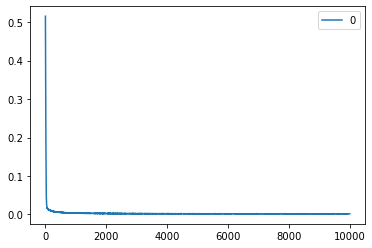

In [126]:
#val_loss = eval_metric(model, history.history, 'loss')
metric = history.history['loss']
val_metric = history.history['val_' + 'loss']

pd.DataFrame(metric).plot()

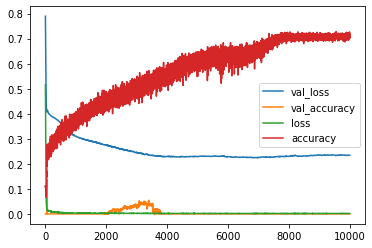

In [127]:
# to plot make data frame out of dict history.history and use .plot() method
pd.DataFrame(history.history).plot()
#pyplot.show()

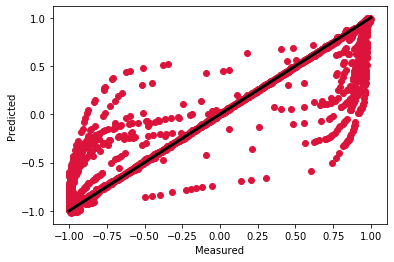

In [128]:
yhat=model.predict(X_test.reshape(X_test.shape[0], k, n_features))
#plt.gca().spines['top'].set_visible(False)

fig, ax = plt.subplots()
#plt.gca().spines['right'].set_visible(False)
ax.scatter(y_test, yhat,  c='crimson')
ax.plot([y_test.min(), yhat.max()], [y_test.min(),  yhat.max()], 'k', lw=3)
#plt.plot(y_test, yhat, zorder=1)  
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

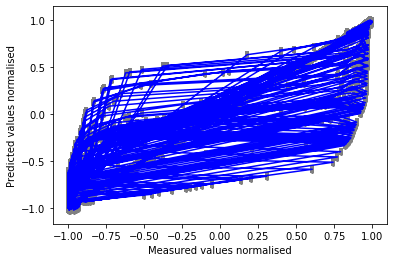

In [129]:
##### plt.scatter(y_test_unscaled , y_pred_unscaled,  color='#0000CC')
fig, ax = plt.subplots()
dy = 0.04
plt.errorbar(y_test, yhat, yerr=dy, fmt='b', color='r',
             ecolor='gray', elinewidth=4, capsize=1);

ax.set_xlabel('Measured values normalised')
ax.set_ylabel('Predicted values normalised')
fig.savefig(fileNameForDLFigures(midfix = 'PredAgainstTested_Charging'))

In [130]:
def unscale(y_values, scaler):
    return scaler.inverse_transform(y_values)

y_pred_unscaled, y_test_unscaled = unscale(yhat, scaler), unscale(y_test, scaler)


In [131]:
def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap

/home/yogender/miniconda3/envs/kerasClone/lib/python3.7/site-packages/ipykernel_launcher.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x432 with 0 Axes>

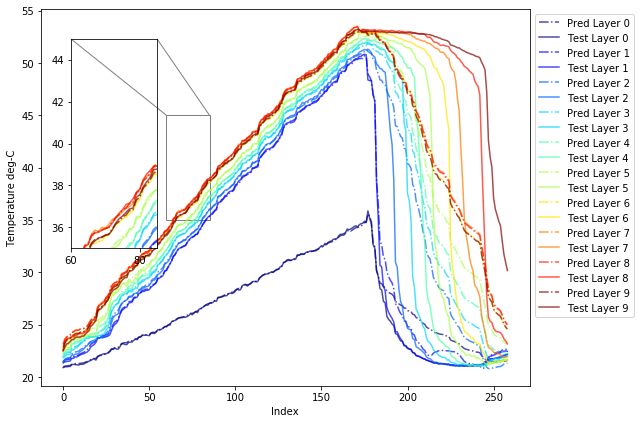

(<Figure size 648x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa8fbbac510>)

In [132]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
def plotPredAndActualTem(yhat, ytest, alpha =0.7, scm=None):
    cmap_name = "jet"
    fig = plt.figure(figsize=(6,6))
    #ax = fig.add_subplot()
    fig, ax = plt.subplots(1, figsize=(9,6))
    #fig.subplots_adjust(left=0.2, bottom=0.2)
    
    tem_Pred_df = pd.DataFrame(yhat).iloc[:,0:10]
    tem_test_df =  pd.DataFrame(ytest).iloc[:,0:10]
    
   # len_df = len(tem_Pred_df)
    
    tem_PredZoom_df = tem_Pred_df.iloc[20:40, :]
    tem_TestZoom_df = tem_test_df.iloc[20:40, :]
    
    

    scm = create_color_step_obj(cmap_name, 10)
    
    #########################
    axins = zoomed_inset_axes(ax, 2,  loc=2, borderpad=3)
    mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
    axins.set_xlim([60,85])
    axins.set_ylim([35,45])
    for i in range (0,  tem_Pred_df.shape[1]):
        ax.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        ax.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))
        


        axins.plot(tem_Pred_df.index, tem_Pred_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot')
        
        axins.plot(tem_test_df.index, tem_test_df.iloc[:, i], color= scm.to_rgba(i, alpha=alpha),\
                label = 'Test Layer ' + str(i))

        #plt.show()
 
        '''
        sub_axes = plt.axes([.2, .55, .3, .3]) 
        sub_axes.plot(tem_PredZoom_df.index, tem_PredZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i)) 
        sub_axes.plot( tem_TestZoom_df.index,  tem_TestZoom_df.iloc[:, i], c = 'k', color= scm.to_rgba(i, alpha=alpha),\
                label = 'Pred Layer ' + str(i),  ls='dashdot') 
        '''
    
    
        #ax.legend(bbox_to_anchor=(0.8,0.8))
        ax.set_ylabel('Temperature deg-C')
        ax.set_xlabel('Index')
        #ax.legend(bbox_to_anchor=(0.4,0.8))
    #mark_inset(ax, axins, loc1=1, loc2=1, fc="none", ec="0.1")
    fig.canvas.draw()
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    fig.savefig(fileNameForDLFigures(midfix = 'Tem_Charging'))
    return fig, ax
plotPredAndActualTem(y_pred_unscaled, y_test_unscaled, alpha =0.7, scm=None)